# Flight Price Analysis

In this analysis, we will thoroughly examine flight price data contained in the file named flight.csv. The primary goal of the analysis is to understand how airfare prices are influenced by various factors such as airlines, flight classes, departure and arrival times, and additional factors that affect the final ticket price.

The analysis will include a review of the variety of flight classes offered by airlines, such as Economy and Business Class, and will explore how ticket prices differ between these classes. Additionally, we will analyze the impact of flight timings, both in terms of departure and arrival times, on ticket prices. We will also group data by flight class, which will allow for a deeper understanding of consumer preferences and behaviors in terms of service choices and their willingness to pay higher prices for specific flight features.

The data for this analysis is sourced from this link on Kaggle [https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('flight.csv')
economy_flights = df[df['class']=='Economy']
business_flights= df[df['class']=='Business']


In [3]:
business_flights['airline'].unique()

array(['Air_India', 'Vistara'], dtype=object)

In [4]:
economy_flights.loc[:, 'route'] = economy_flights['source_city'] + " to " + economy_flights['destination_city']
economy_flights_route =economy_flights['route'].unique()
business_flights.loc[:, 'route'] = business_flights['source_city'] + " to " + business_flights['destination_city']
business_flights_route = business_flights['route'].unique() 

economy_flights.loc[:, 'periot_time_flight'] = economy_flights['departure_time'] + " to " + economy_flights['arrival_time']
economy_flights_time = economy_flights['periot_time_flight'].unique()


/var/folders/zp/fzly6hjs1q1dqk65hym5d38r0000gn/T/ipykernel_6473/393896984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economy_flights.loc[:, 'route'] = economy_flights['source_city'] + " to " + economy_flights['destination_city']
/var/folders/zp/fzly6hjs1q1dqk65hym5d38r0000gn/T/ipykernel_6473/393896984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_flights.loc[:, 'route'] = business_flights['source_city'] + " to " + business_flights['destination_city']
/var/folders/zp/fzly6hjs1q1dqk65h

In [5]:
business_flights.loc[:, 'periot_time_flight'] = business_flights['departure_time'] + " to " + business_flights['arrival_time']
business_flights_time = business_flights['periot_time_flight'].unique()

/var/folders/zp/fzly6hjs1q1dqk65hym5d38r0000gn/T/ipykernel_6473/2357901585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_flights.loc[:, 'periot_time_flight'] = business_flights['departure_time'] + " to " + business_flights['arrival_time']


In [6]:
data = {
    'Route': [
        'Delhi to Mumbai', 'Delhi to Bangalore', 'Delhi to Kolkata', 'Delhi to Hyderabad', 'Delhi to Chennai',
        'Mumbai to Delhi', 'Mumbai to Bangalore', 'Mumbai to Kolkata', 'Mumbai to Hyderabad', 'Mumbai to Chennai',
        'Bangalore to Delhi', 'Bangalore to Mumbai', 'Bangalore to Kolkata', 'Bangalore to Hyderabad', 'Bangalore to Chennai',
        'Kolkata to Delhi', 'Kolkata to Mumbai', 'Kolkata to Bangalore', 'Kolkata to Hyderabad', 'Kolkata to Chennai',
        'Hyderabad to Delhi', 'Hyderabad to Mumbai', 'Hyderabad to Bangalore', 'Hyderabad to Kolkata', 'Hyderabad to Chennai',
        'Chennai to Delhi', 'Chennai to Mumbai', 'Chennai to Bangalore', 'Chennai to Kolkata', 'Chennai to Hyderabad'
    ],
    'Distance (km)': [
        1150, 1743, 1318, 1262, 1760,
        1150, 843, 1657, 622, 1032,
        1743, 843, 1559, 498, 291,
        1318, 1657, 1559, 1182, 1355,
        1262, 622, 498, 1182, 513,
        1760, 1032, 291, 1355, 513
    ]
}
df = pd.DataFrame(data)
average_distance = df['Distance (km)'].mean()
average_distance

np.float64(1119.0)

# Indicates 

## Business class 

### Percentage of airlines in business class

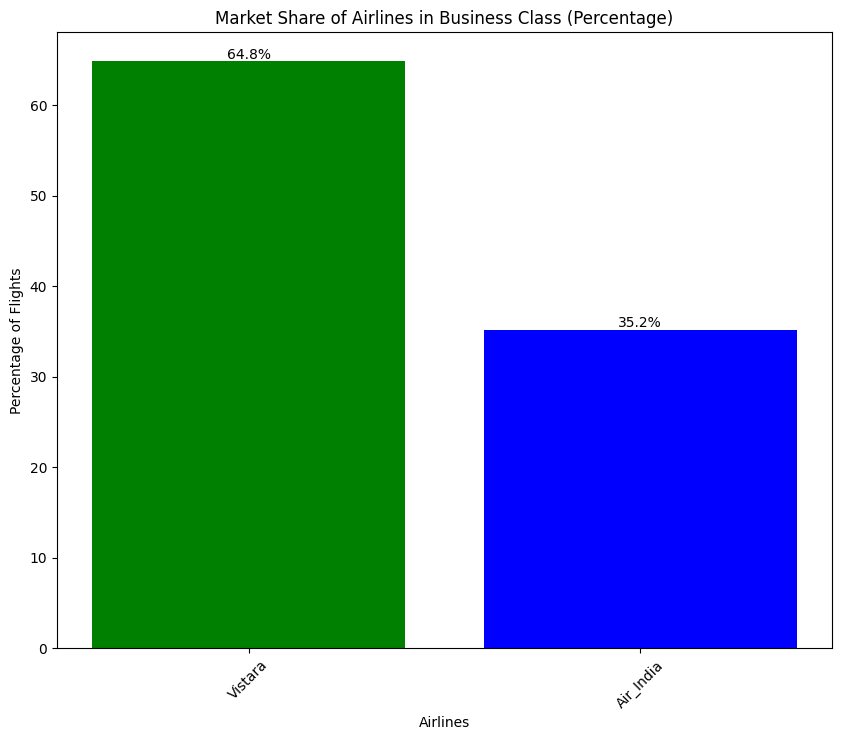

In [7]:
airline_counts = business_flights['airline'].value_counts()

total_flights = airline_counts.sum()
percentages = (airline_counts / total_flights) * 100
colors = ['green', 'blue'] 
plt.figure(figsize=(10, 8))
bars = plt.bar(percentages.index, percentages.values, color=colors)
plt.title('Market Share of Airlines in Business Class (Percentage)')
plt.xlabel('Airlines')
plt.ylabel('Percentage of Flights')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

The pie chart illustrates the market share of two airlines in the business class segment. It shows that Vistara dominates the market with a share of 64.8%, which constitutes a significant majority. Conversely, Air India holds a smaller share of 35.2%. The chart depicts the proportion of flights operated by both airlines, highlighting Vistara's stronger position in the market compared to Air India. This chart is a useful tool for visualizing the differences in the scale of operations between these two competitors, showing a clear advantage of one airline over the other.

### Number of Flights

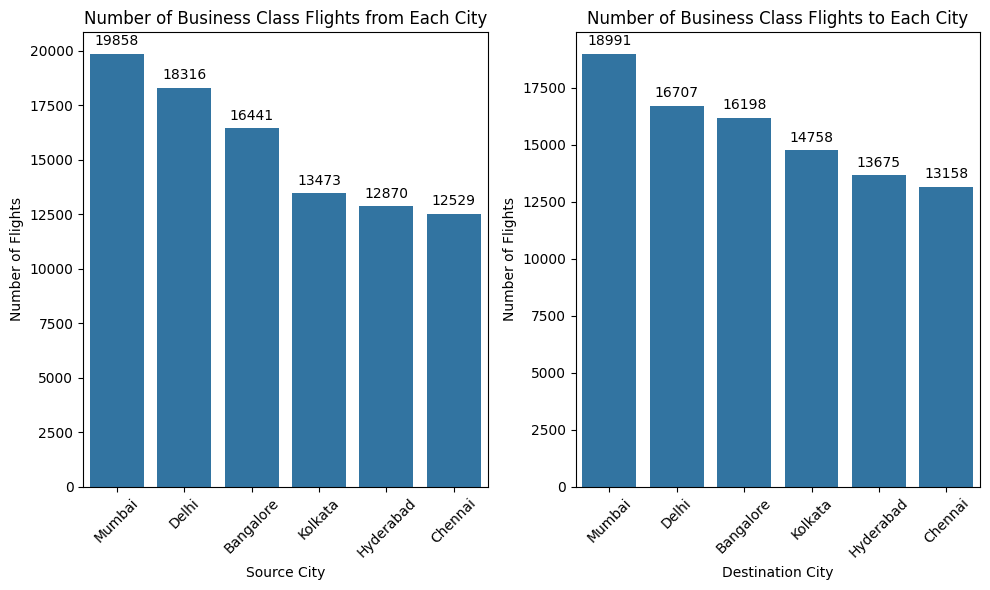

In [8]:
flights_counts = business_flights['source_city'].value_counts()

flights_counts_dest = business_flights['destination_city'].value_counts()

plt.figure(figsize=(10, 6)) 

plt.subplot(1, 2, 1)
barplot = sns.barplot(y=flights_counts.values, x=flights_counts.index)
plt.ylabel('Number of Flights')
plt.xlabel('Source City')
plt.title('Number of Business Class Flights from Each City')
plt.xticks(rotation=45)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.subplot(1, 2, 2)
barplot_dest = sns.barplot(y=flights_counts_dest.values, x=flights_counts_dest.index)
plt.ylabel('Number of Flights')
plt.xlabel('Destination City')
plt.title('Number of Business Class Flights to Each City')
plt.xticks(rotation=45)

for p in barplot_dest.patches:
    barplot_dest.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 9), 
                          textcoords='offset points')

plt.tight_layout()
plt.show()

The chart displays the number of business class flights from and to various cities. For flights originating from cities, Mumbai tops the list with the highest number of business flights, amounting to 19,858. Delhi is in second place with 18,316 flights, and Bangalore ranks third with 16,441 flights. Kolkata, Hyderabad, and Chennai have respectively 13,473, 12,870, and 12,529 business flights.

For flights heading to cities, Mumbai also leads with a total of 18,991 business flights. Delhi is second with 16,707 flights, and Bangalore is third with 16,198 flights. Kolkata, Hyderabad, and Chennai follow with 14,758, 13,675, and 13,158 business flights, respectively.

Overall, India's major cities such as Mumbai, Delhi, and Bangalore serve as key hubs both as sources and destinations of business flights. This reflects their economic and business importance in the country, as well as their status as major transportation nodes in India.

### Prices

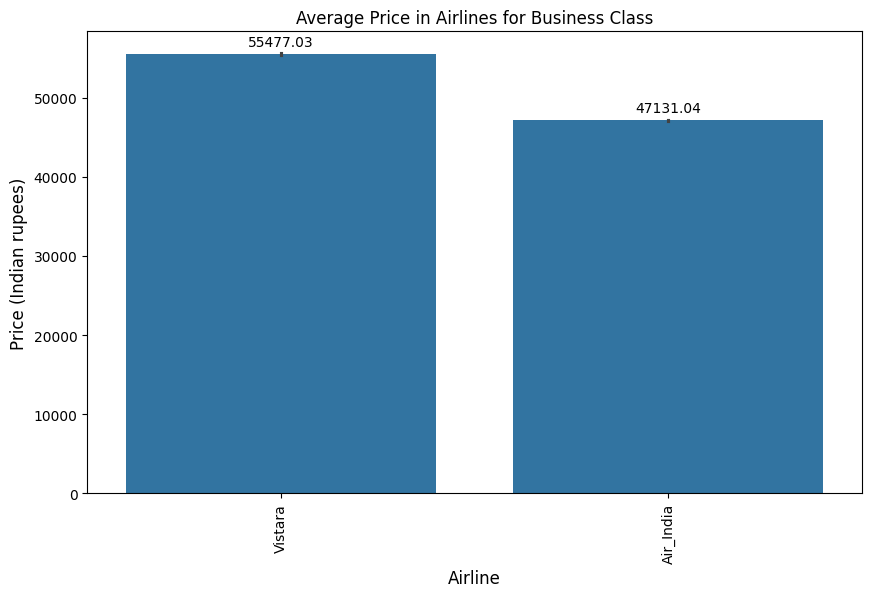

In [9]:
plt.figure(figsize=(10, 6))
sorted_flights = business_flights.sort_values('price', ascending=False)
barplot = sns.barplot(x='airline', y='price', data=sorted_flights)
plt.title('Average Price in Airlines for Business Class')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Price (Indian rupees)', fontsize=12)
plt.xticks(rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')


plt.show()

The chart presents a comparison of average business class ticket prices for two airlines: Vistara and Air India. The chart shows that the average price of a business class ticket is higher for Vistara, amounting to 55,477.03 rupees, while for Air India, the average price is 47,131.04 rupees. These data may indicate differences in the level of services offered, availability of additional amenities, or the pricing strategies of the two airlines.

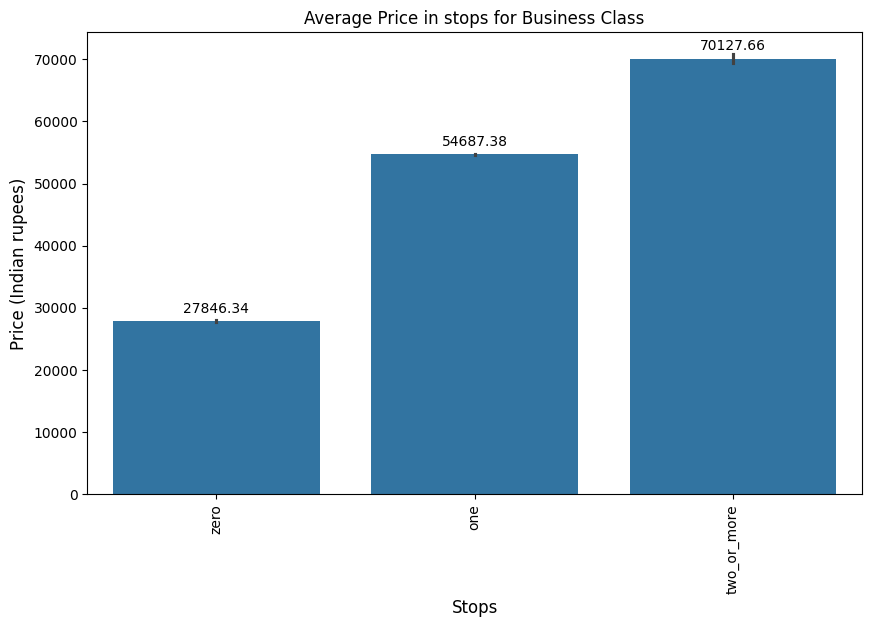

In [10]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='stops', y='price', data=business_flights)
plt.title('Average Price in stops for Business Class')
plt.xlabel('Stops', fontsize=12)
plt.ylabel('Price (Indian rupees)', fontsize=12)
plt.xticks(rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')


plt.show()

The chart displays the average price of business class tickets based on the number of stops. The analysis indicates that ticket prices increase with the number of stops. For non-stop flights, the average price is 27,846.34, for flights with one stop it rises to 54,687.38, and for flights with two or more stops, it reaches the highest value of 70,127.66. These results may reflect higher logistical costs and increased travel time, which are compensated by higher ticket prices.

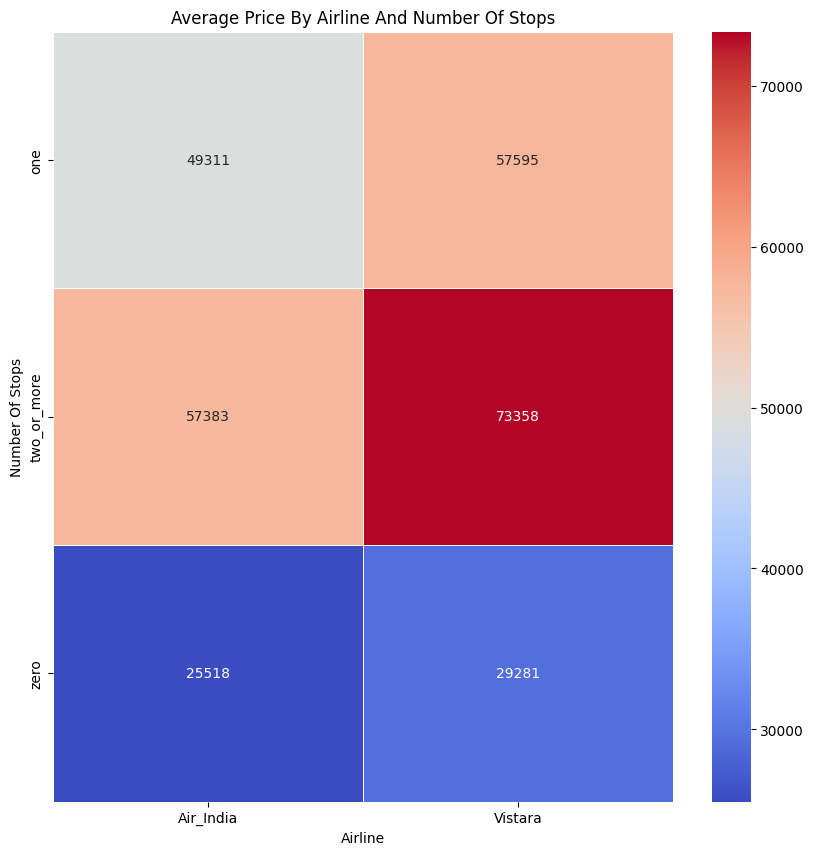

In [11]:
plt.figure(figsize=(10, 10))
pivot_table = business_flights.pivot_table(index='stops', columns='airline', values='price', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price By Airline And Number Of Stops')
plt.ylabel('Number Of Stops')
plt.xlabel('Airline')
plt.show()

This heatmap presents a comparison of average airfare prices for two airlines: Air India and Vistara, depending on the number of stops on the route. The map uses a color gradient from light blue to red to illustrate the price differences associated with direct flights and those with one and two stops.

For both airlines, non-stop flights are generally cheaper. Increasing the number of stops results in a price increase, which is particularly noticeable in flights with two stops, where the prices are the highest.
Comparison between the airlines: Vistara consistently offers higher prices compared to Air India across all stop categories, suggesting their positioning as a premium airline.
Lowest and highest prices: Air India offers the lowest price for non-stop flights at 25,518 Indian rupees, while Vistara has the highest price for flights with two stops at 73,358 Indian rupees.

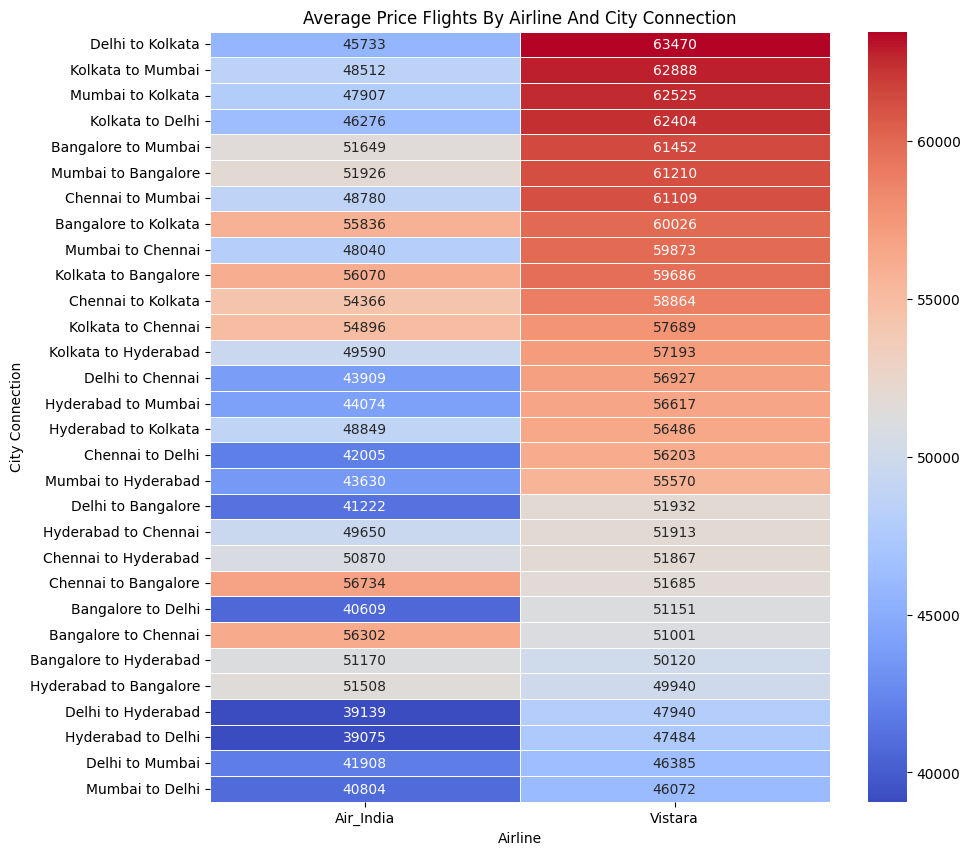

In [12]:
plt.figure(figsize=(10, 10))
pivot_table = business_flights.pivot_table(index='route', columns='airline', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by=['Vistara', 'Air_India'], ascending=[False, False])
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price Flights By Airline And City Connection')
plt.ylabel('City Connection')
plt.xlabel('Airline')
plt.show()


This heatmap shows the average airfare prices for various intercity connections in India, comparing prices between Air India and Vistara.

Ticket prices significantly differ between the airlines, with Vistara often offering more expensive tickets, which may reflect their positioning as a premium airline. Price trends on popular routes: Some routes, such as Bangalore to Kolkata or Delhi to Mumbai, show higher prices, which could be due to higher demand or limited availability. Routes like Chennai to Kolkata (for Air India) and Delhi to Kolkata (for Vistara) show particularly high prices, while connections like Delhi to Hyderabad for Air India are relatively cheaper.

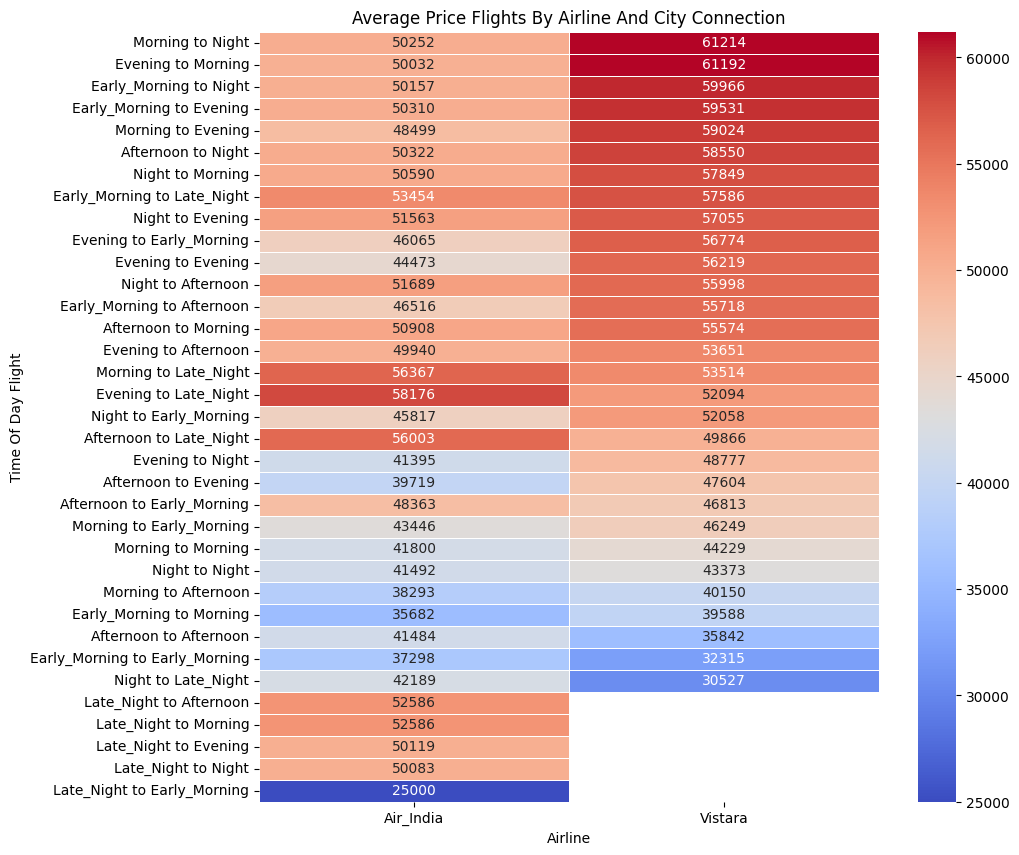

In [13]:
plt.figure(figsize=(10, 10))
pivot_table = business_flights.pivot_table(index='periot_time_flight', columns='airline', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by=['Vistara', 'Air_India'], ascending=[False, False])
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price Flights By Airline And City Connection')
plt.ylabel('Time Of Day Flight')
plt.xlabel('Airline')
plt.show()

The chart shows the average prices of business class tickets depending on the airline and the time of day of the flight.

It is noticeable that ticket prices vary depending on the time of day. For example, higher prices mainly occur during nighttime and early morning hours, suggesting higher operational costs or limited availability of flights at these times. The most expensive connections, marked with a darker color, indicate times when demand is lower or costs are higher.

Missing cells suggest that not all airlines offer flights at all times of the day, which may indicate a specific offering or limited availability of flights during certain hours.

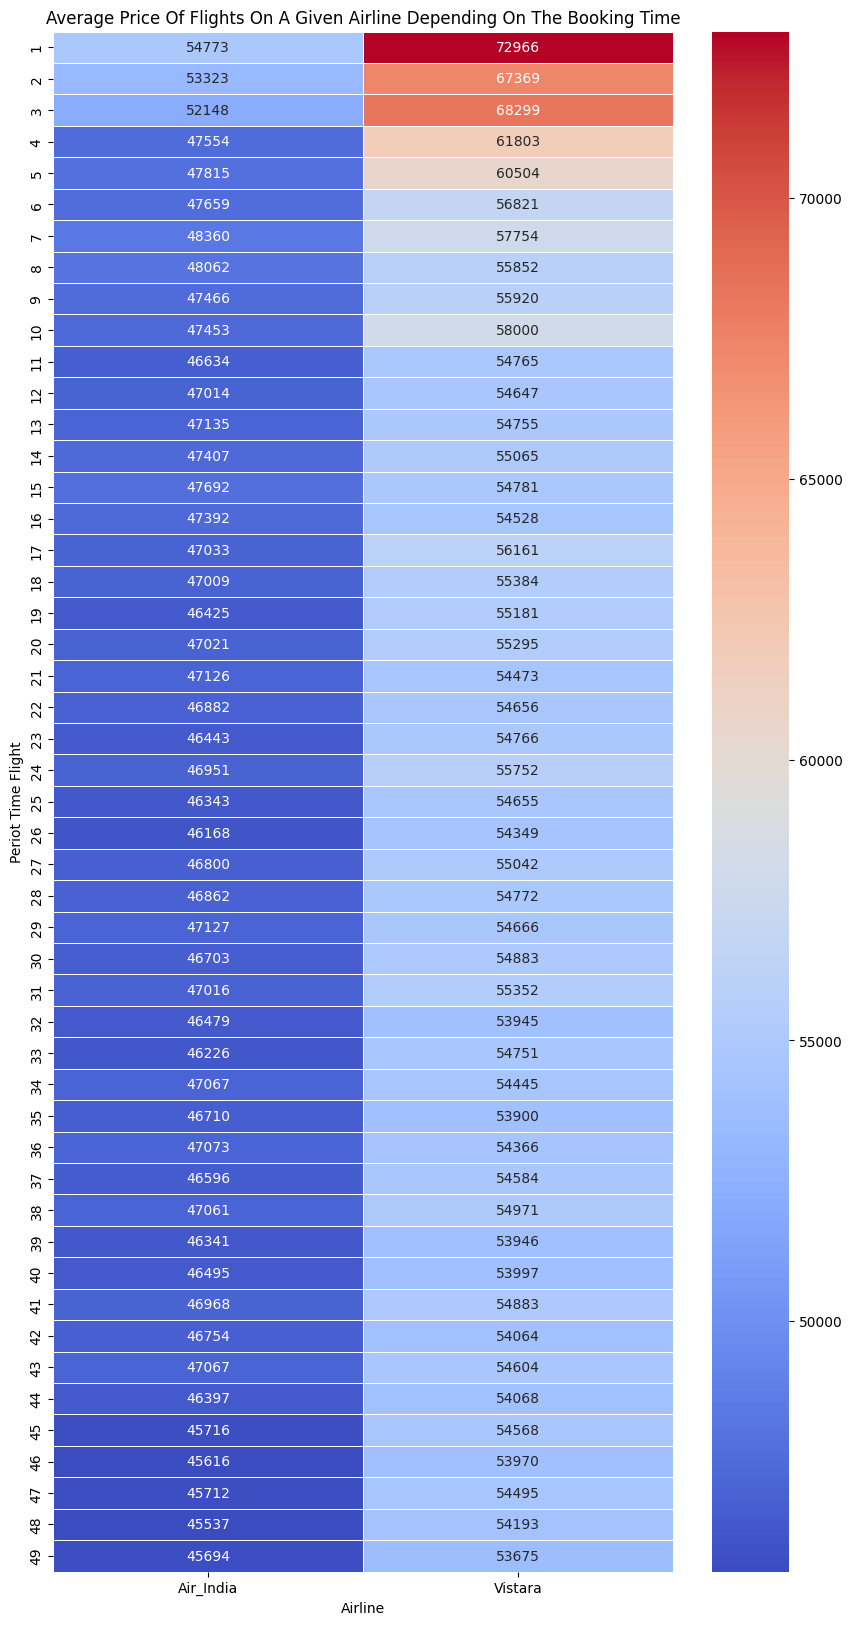

In [14]:
plt.figure(figsize=(10, 20))
pivot_table = business_flights.pivot_table(index='days_left', columns='airline', values='price', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price Of Flights On A Given Airline Depending On The Booking Time')
plt.ylabel('Periot Time Flight')
plt.xlabel('Airline')
plt.show()

This heatmap illustrates the average airfare prices by airline depending on the booking period.

Typically, the earlier the booking is made, the lower the prices, which is visualized by a gradual transition from red shades (high prices) to blue (low prices) down each column.
The highest ticket prices often occur just before the flight date, marked with red shades at the top of each column, reflecting high demand and short availability.
Prices significantly vary between airlines for the same booking periods, indicating the application of diverse pricing strategies by different carriers.

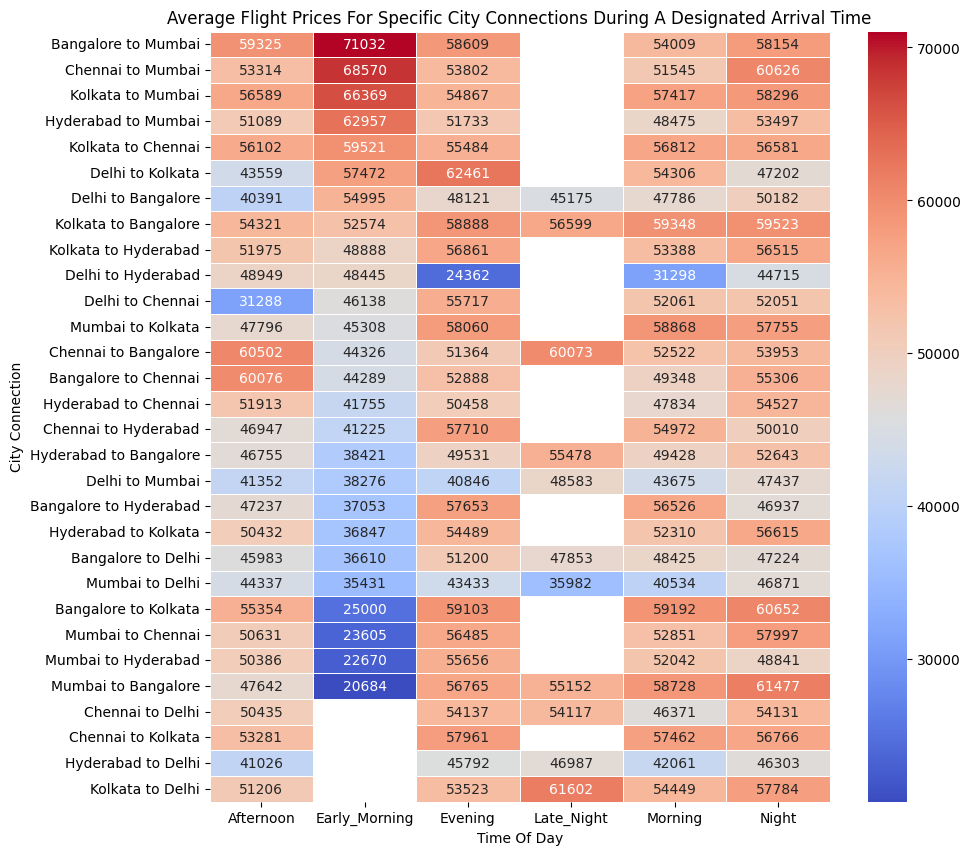

In [15]:
pivot_table = business_flights.pivot_table(index='route', columns='arrival_time', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='Early_Morning', ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Flight Prices For Specific City Connections During A Designated Arrival Time')
plt.ylabel('City Connection')
plt.xlabel('Time Of Day')
plt.show()



This heatmap presents the average airfare prices for specific connections between major cities in India, considering different arrival times.

Airfare prices significantly vary depending on the time of arrival. For instance, flights arriving in the morning and evening usually have higher prices, as indicated by the red shades in these columns.
Some connections, like Bangalore to Mumbai and Chennai to Mumbai, show exceptionally high prices for flights at specific times, which may be related to higher demand or a limited number of available flights.

The absence of data in some cells indicates a lack of available information or flights during certain time windows. For example, missing data for flights arriving in the evening could mean that airlines do not offer flights at these hours on specified routes.

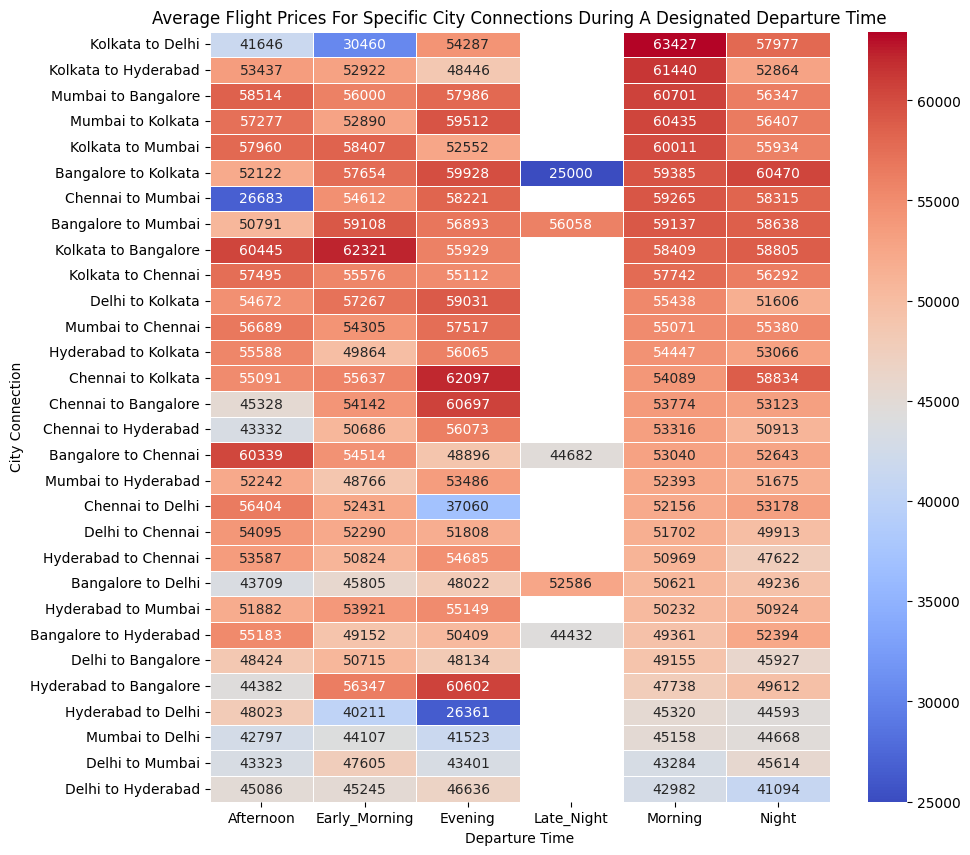

In [16]:
pivot_table = business_flights.pivot_table(index='route', columns='departure_time', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='Morning', ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Flight Prices For Specific City Connections During A Designated Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('City Connection')
plt.show()


This heatmap displays the average airfare prices for specific intercity connections in India, considering departure time and various types of connections, including direct and connecting flights.
The map shows how airfare prices vary depending on the time of day. For example, early morning and evening flights often have higher prices, which are visualized in red.
Some routes, such as Chennai to Kolkata, show extreme price variations depending on the departure time, with very high prices for morning flights and significantly lower prices for evening connections.

The presence of empty cells on the map, particularly in the "Late_Night" column, may indicate a lack of available data, the unavailability of flights during these specific time windows, or the unpopularity of these connections at those times. For example, the absence of data for the Chennai to Hyderabad connection in the "Late_Night" category may suggest that there are no night flights or that they are very rare.

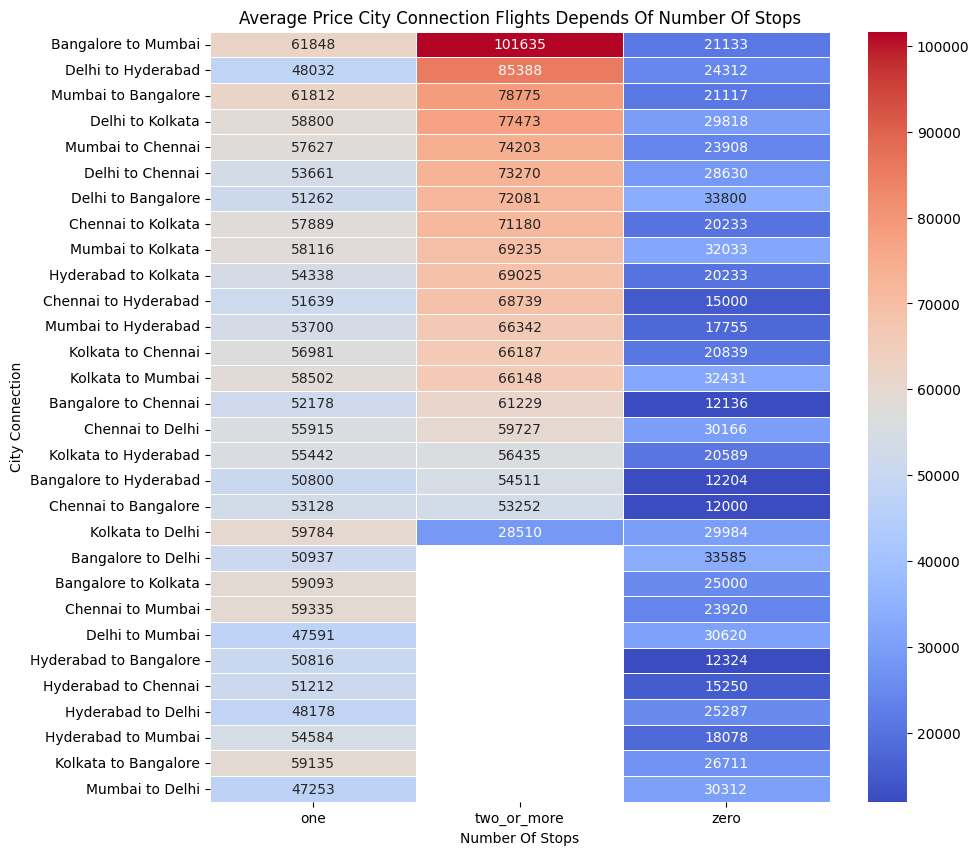

In [17]:

pivot_table = business_flights.pivot_table(index='route', columns='stops', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='two_or_more', ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price City Connection Flights Depends Of Number Of Stops')
plt.ylabel('City Connection')
plt.xlabel('Number Of Stops')
plt.show()
# dopisać skrany przypadek

The presented heatmap illustrates the average airfare prices for various intercity connections in India, taking into account the number of stops on the route.

There are significant price differences depending on the number of stops. Direct flights are usually cheaper, as indicated by the blue and light blue colors in the "zero" column. Flights with more stops tend to be more expensive, especially those with two or more stops, illustrated by red coloring. Some routes, such as Bangalore to Mumbai, Chennai to Kolkata, and Hyderabad to Kolkata, show very high prices for flights with one stop, suggesting that market specifics or limited availability may be influencing the price.

The lack of data in some cells may result from the unavailability of flights with a certain number of stops for a given route. For example, the absence of data for flights with two or more stops on the Delhi to Chennai route may indicate that such connections are not offered by airlines or are very rare.

An extreme case in the "two or more" stops column is the route from Kolkata to Delhi, which shows the lowest price at 28,510 INR. The low price may suggest that connections with multiple stops are less frequently chosen by passengers due to longer travel times or less convenient routes, leading to lower prices to attract customers. Alternatively, it could also mean that airlines offer promotional prices on less popular routes with more stops to increase their attractiveness.

### Duration

<function matplotlib.pyplot.show(close=None, block=None)>

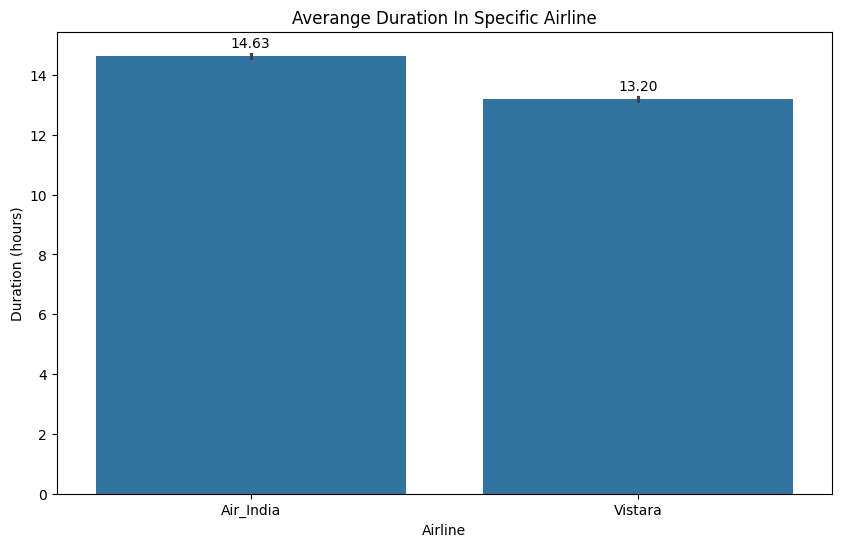

In [18]:
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='airline', y='duration', data=business_flights)
plt.title('Averange Duration In Specific Airline')
plt.xlabel('Airline')
plt.ylabel('Duration (hours)')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show


Air India has a slightly longer average flight duration compared to Vistara. This difference may stem from the different routes served by both airlines, with Air India possibly operating more long-haul international flights.

The longer flights of Air India may also indicate that it frequently operates routes with more stopovers, which is typical for flagship carriers with an extensive international network.

Travel Planning and Airline Selection:

The comparison of average flight durations between these two airlines highlights how the nature of their operations varies depending on the carrier, which can influence passengers' decisions when choosing an airline. This comparison may also provide insights for airline management in optimizing routes and improving operational efficiency. Additionally, this shows that time plays an important role, which contributes to Vistara being a more expensive airline.

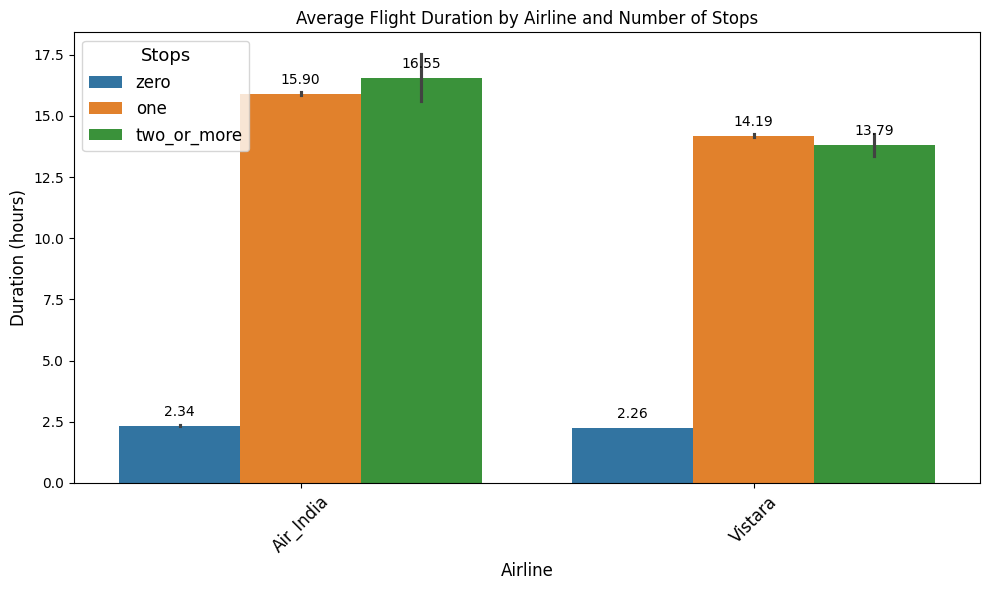

In [19]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='airline', y='duration', hue='stops', data=business_flights)
plt.title('Average Flight Duration by Airline and Number of Stops', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Duration (hours)', fontsize=12)
plt.xticks(rotation=45, fontsize=12)

for p in barplot.containers:
    barplot.bar_label(p, fmt='%.2f', label_type='edge', padding=5)
plt.legend(title='Stops', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.show()


The presented chart compares the average flight durations offered by two airlines: Air India and Vistara, considering the number of stopovers. The chart provides valuable insights into how layovers impact travel time.

Non-stop flights (zero stops):
- Air India offers very short non-stop flights, with an average duration of just 2.34 hours.
- Vistara also has short direct flights, with an average duration of 2.26 hours.

Flights with one stop:
- Both Air India and Vistara show a significant increase in flight duration with one stop. Air India's average flight duration increases to 15.90 hours, which is considerably longer than their non-stop flights. Vistara also sees an increase in duration, averaging 14.19 hours for flights with one stop.

Flights with two or more stops:
- Air India offers the longest flights with two or more stops, averaging 16.55 hours. For Vistara, the average flight duration for these connections is 13.79 hours, which is shorter compared to Air India.

### Airplane Speed

In [20]:
stops_mapping = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}
business_flights['stops'] = business_flights['stops'].map(stops_mapping)

/var/folders/zp/fzly6hjs1q1dqk65hym5d38r0000gn/T/ipykernel_6473/2292592985.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=12)


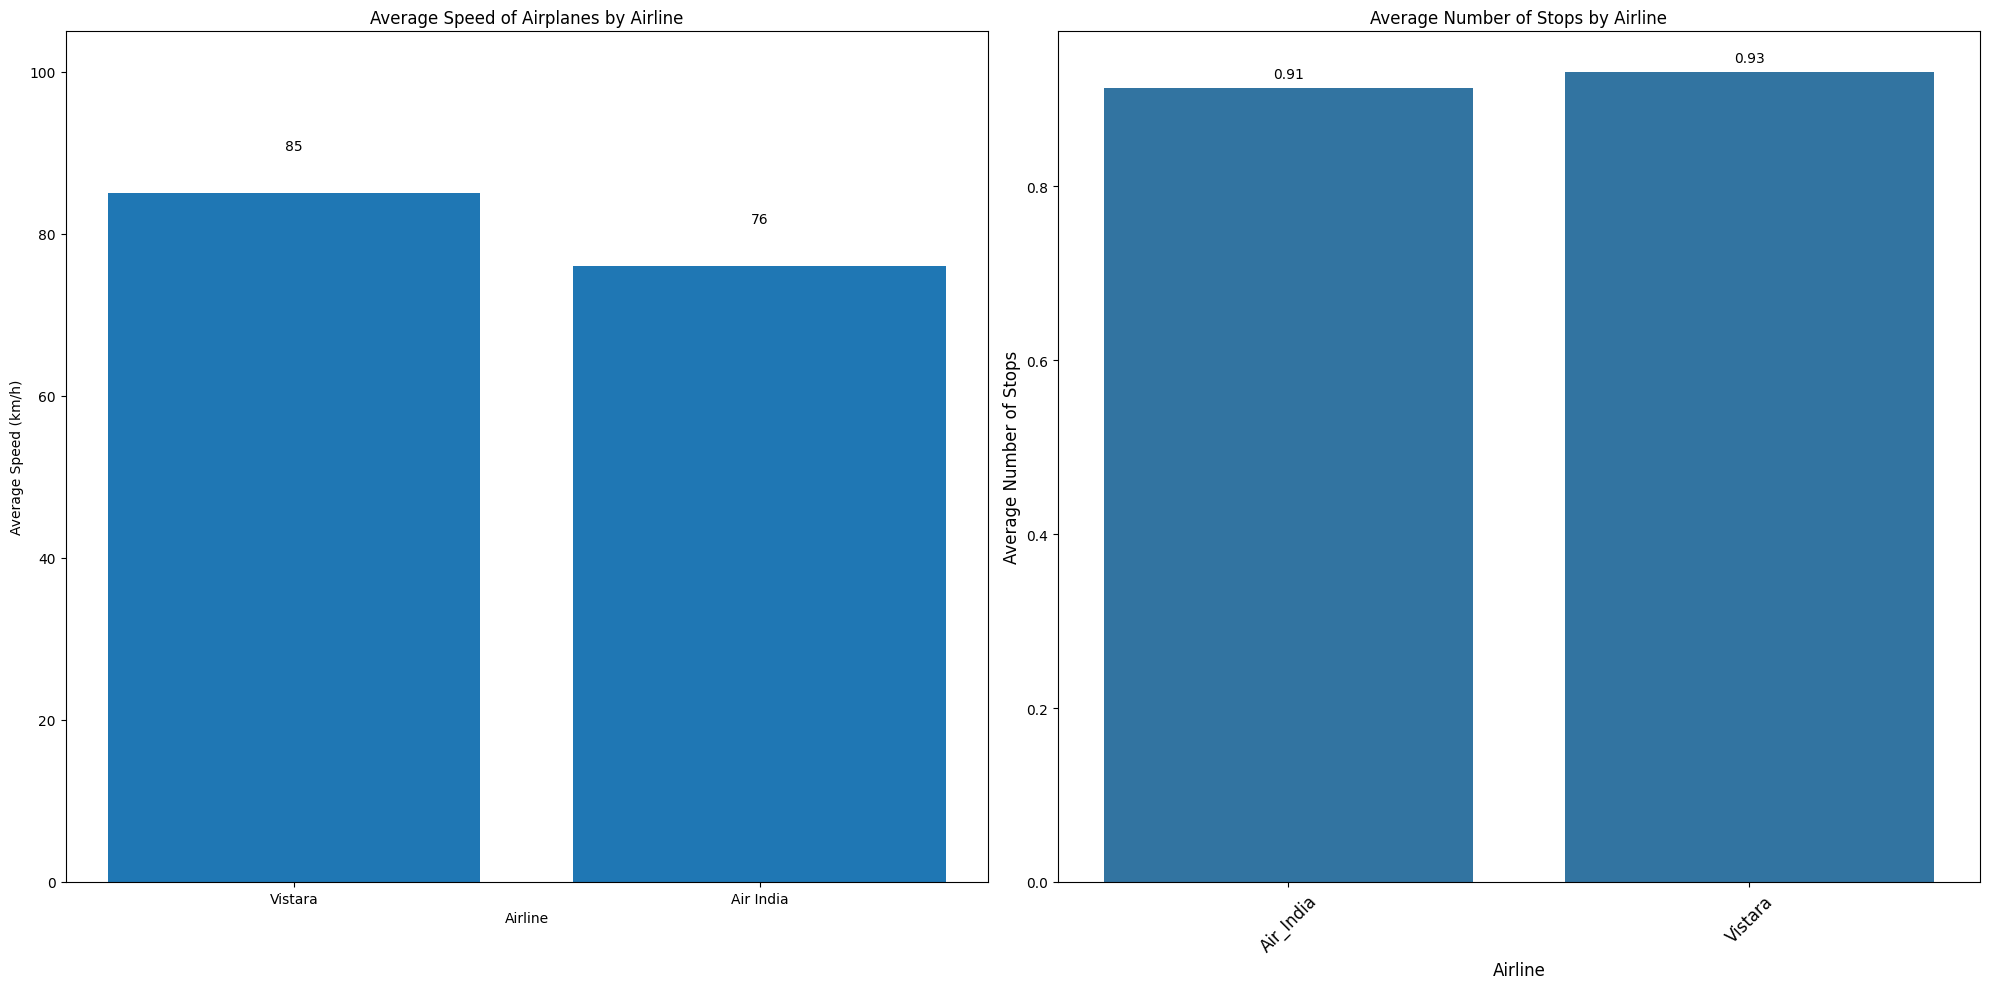

In [21]:
durations = {
    'Air India': 14.63,
    'Vistara': 13.2,
  
}
round_trip_distance_km = 1119 


speeds = {airline: round(round_trip_distance_km / duration) for airline, duration in durations.items()}


sorted_speeds = dict(sorted(speeds.items(), key=lambda item: item[1], reverse=True))


average_stops = business_flights.groupby('airline')['stops'].mean().reset_index()

average_stops = average_stops.sort_values(by='stops', ascending=True)


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].bar(sorted_speeds.keys(), sorted_speeds.values())
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Average Speed (km/h)')
axes[0].set_title('Average Speed of Airplanes by Airline')
axes[0].set_ylim(0, max(sorted_speeds.values()) + 20)

for bar in axes[0].patches:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

if not average_stops.empty:
    sns.barplot(x='airline', y='stops', data=average_stops, ax=axes[1])
    axes[1].set_title('Average Number of Stops by Airline', fontsize=12)
    axes[1].set_xlabel('Airline', fontsize=12)
    axes[1].set_ylabel('Average Number of Stops', fontsize=12)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=12)

    for p in axes[1].containers:
        axes[1].bar_label(p, fmt='%.2f', label_type='edge', padding=5)
else:
    axes[1].text(0.5, 0.5, 'No data available to plot', ha='center', va='center', fontsize=15)
    axes[1].set_axis_off()

plt.tight_layout()
plt.show()


The following charts provide a comparison of the average speed of airplanes and the average number of stops for two airlines: Vistara and Air India.

Left Chart:
Title: "Average Speed of Airplanes by Airline".
Description: The bar chart shows the average flight speed for each airline.
Vistara achieves an average speed of 85 km/h.
Air India has an average speed of 76 km/h.
It is evident that Vistara is faster compared to Air India.

Right Chart:
Title: "Average Number of Stops by Airline".
Description: This bar chart illustrates the average number of stops for each airline.
Vistara has an average of 0.91 stops.
Air India has an average of 0.93 stops.
Both airlines have very similar average numbers of stops, with Air India having a slightly higher value.

Overall Interpretation:
Vistara offers a higher average speed compared to Air India.
The difference in the number of stops between the two airlines is minimal, suggesting that it might not be a significant factor for passengers when choosing between these airlines.

## Economy class 

### Percentage of airlines in economy class

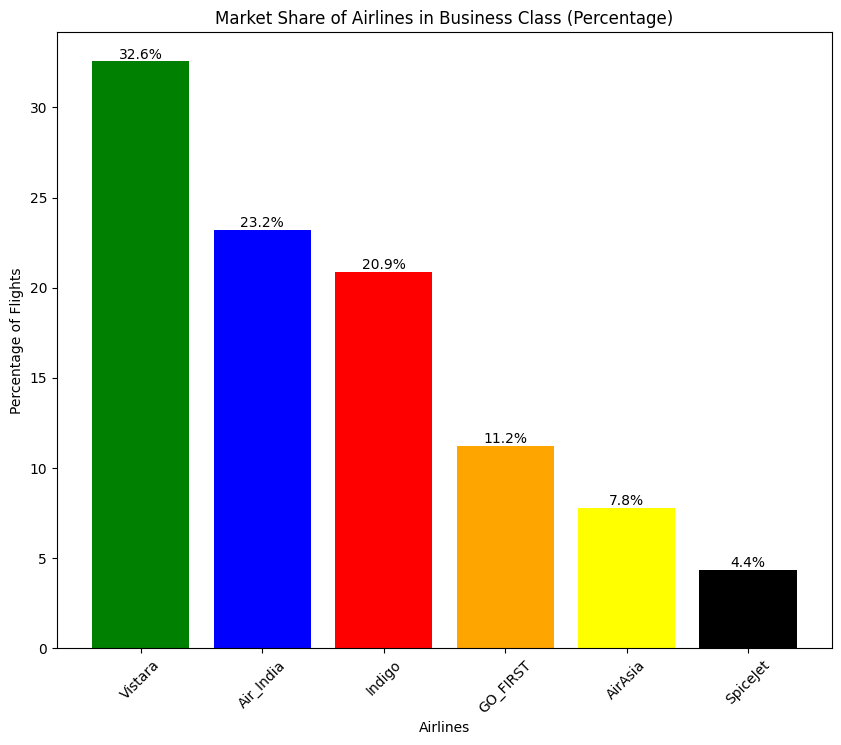

In [22]:
airline_counts = economy_flights['airline'].value_counts()
total_flights = airline_counts.sum()
percentages = (airline_counts / total_flights) * 100
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'black'] 
plt.figure(figsize=(10, 8))
bars = plt.bar(percentages.index, percentages.values, color=colors)
plt.title('Market Share of Airlines in Business Class (Percentage)')
plt.xlabel('Airlines')
plt.ylabel('Percentage of Flights')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

The pie chart illustrates the market share of airlines in the economy class. Vistara dominates the market with the largest share at 32.6%, indicating the airline's strong position in the aviation industry. Indigo ranks second with a 20.9% share, and Air India is in third place with 23.2%, highlighting their significant presence in the market. GO_FIRST holds 11.2% of the market, placing it fourth, while AirAsia and SpiceJet have 7.8% and 4.4% of the market, respectively, indicating their smaller market share compared to the leaders. The chart illustrates the diversity of competition in the aviation sector and can serve as an important indicator for strategic analyses by companies in the industry, as well as for investors and market analysts. The clear differentiation in market share between the leaders and smaller players shows how varied the competition is and may also signal different pricing strategies, service offerings, and customer satisfaction among these airlines.

### Number of Flights

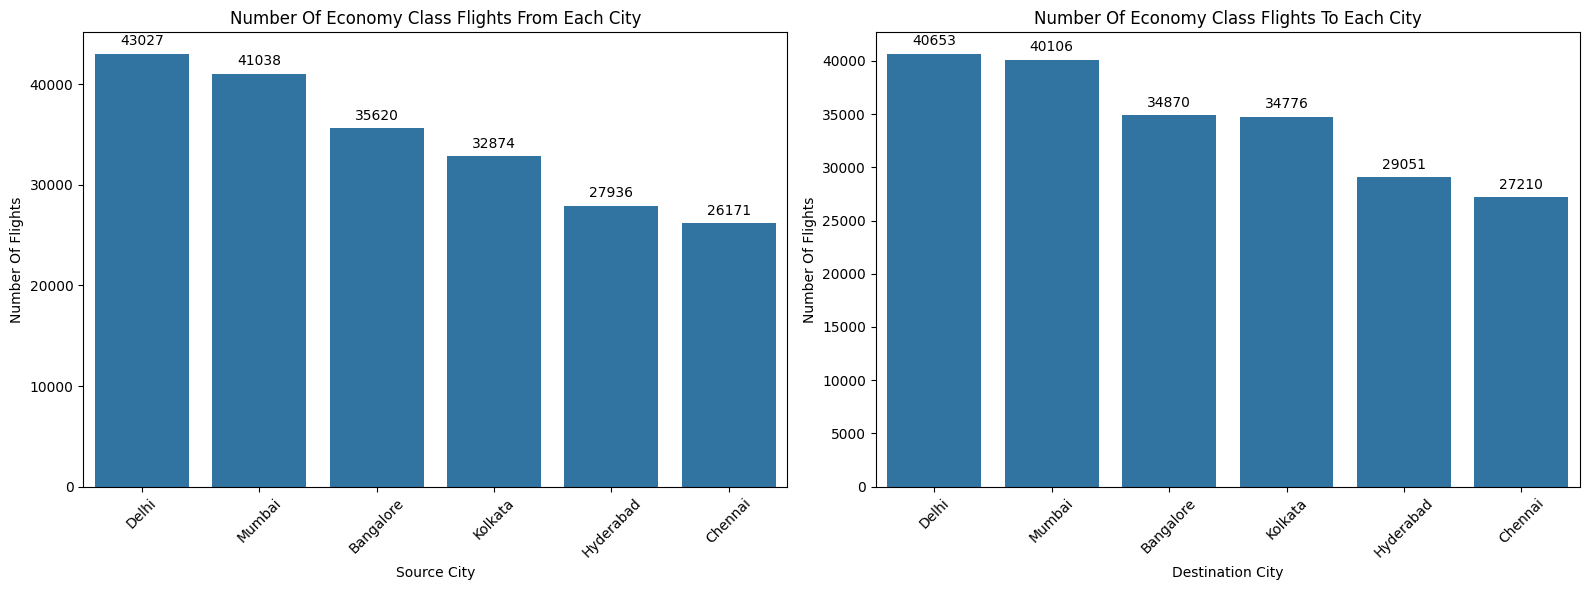

In [23]:
flights_counts = economy_flights['source_city'].value_counts()

flights_counts_dest = economy_flights['destination_city'].value_counts()

plt.figure(figsize=(16, 6)) 

plt.subplot(1, 2, 1)
barplot = sns.barplot(y=flights_counts.values, x=flights_counts.index)
plt.ylabel('Number Of Flights')
plt.xlabel('Source City')
plt.title('Number Of Economy Class Flights From Each City')
plt.xticks(rotation=45)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.subplot(1, 2, 2)
barplot_dest = sns.barplot(y=flights_counts_dest.values, x=flights_counts_dest.index)
plt.ylabel('Number Of Flights')
plt.xlabel('Destination City')
plt.title('Number Of Economy Class Flights To Each City')
plt.xticks(rotation=45)

for p in barplot_dest.patches:
    barplot_dest.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 9), 
                          textcoords='offset points')

plt.tight_layout()
plt.show()

The charts depict the number of economy class flights from and to various cities. For flights originating from cities, Delhi tops the list with the highest number of economy flights, amounting to 43,027. Mumbai ranks second with 41,038 flights, and Bangalore is in third place with 35,620 flights. Kolkata, Hyderabad, and Chennai have 32,874, 27,936, and 26,171 economy flights, respectively.

For flights to cities, Delhi also leads with 40,653 economy flights. Mumbai takes second place with 40,106 flights, while Bangalore and Kolkata have slightly fewer flights, with 34,870 and 34,776, respectively. Hyderabad and Chennai have the lowest number of flights, with 29,051 and 27,210, respectively.

India's largest cities, such as Delhi, Mumbai, and Bangalore, serve as key hubs both as origins and destinations for economy flights, reflecting their importance as major transportation nodes in the country.

### Prices

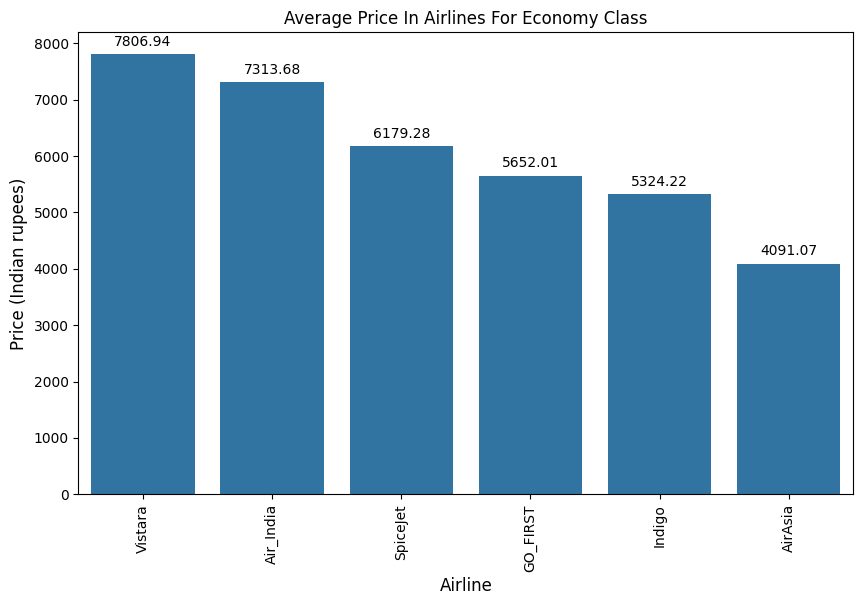

In [24]:
plt.figure(figsize=(10, 6))
economy_flights.loc[:, 'price'] = pd.to_numeric(economy_flights['price'], errors='coerce')
sorted_flights = economy_flights.groupby('airline')['price'].mean().sort_values(ascending=False).reset_index()
barplot = sns.barplot(x='airline', y='price', data=sorted_flights)
plt.title('Average Price In Airlines For Economy Class')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Price (Indian rupees)', fontsize=12)
plt.xticks(rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')


plt.show()

The chart compares the average economy class ticket prices for various airlines. The analysis shows that ticket prices vary significantly between airlines.

Vistara offers the most expensive economy class tickets, with an average price of 7,806.94. Close behind is Air India, with an average price of 7,313.68, suggesting that these two airlines may provide additional amenities or better connections, which are reflected in the higher ticket prices.

SpiceJet and GO_FIRST offer more affordable prices, at 6,179.28 and 5,652.01, respectively, which may appeal to more price-sensitive consumers.

Indigo, known for cost efficiency, offers tickets at even lower prices, with an average of 5,324.22, which may align with their strategy of offering competitive prices on popular routes.

The cheapest tickets are offered by AirAsia, with an average price of 4,091.07, indicating that this airline may primarily compete on price, targeting the most price-sensitive group of passengers.


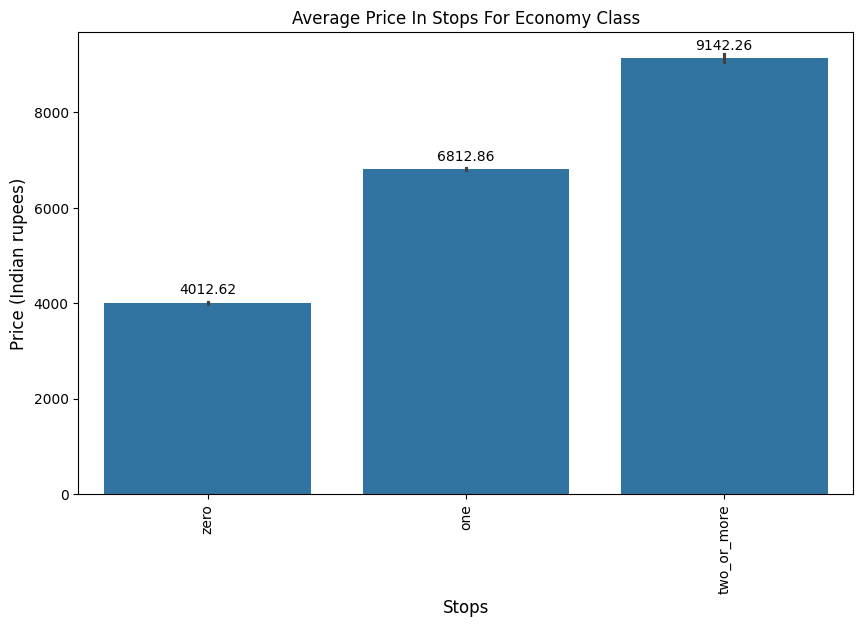

In [25]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='stops', y='price', data=economy_flights)
plt.title('Average Price In Stops For Economy Class')
plt.xlabel('Stops', fontsize=12)
plt.ylabel('Price (Indian rupees)', fontsize=12)
plt.xticks(rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')


plt.show()

The chart shows the average economy class ticket prices based on the number of stops. The analysis indicates that ticket prices increase with the number of stops on the route.

For non-stop flights, the average ticket price is 4,012.62, which is the lowest price compared to flights with stopovers.
For flights with one stop, the price rises to 6,812.86, showing a significant increase in costs, possibly related to the longer travel time and higher operational expenses.
For flights with two or more stops, the average price increases even further, reaching 9,142.26, which may be due to more complex routes and associated additional fees.
This pricing pattern typically reflects the higher logistical and time costs associated with flights requiring stopovers, and it may also indicate the greater value passengers place on direct flights, which are generally more convenient and less time-consuming. Such an analysis is particularly useful for consumers planning their travels, giving them a better understanding of how stopovers impact the overall cost of the journey.

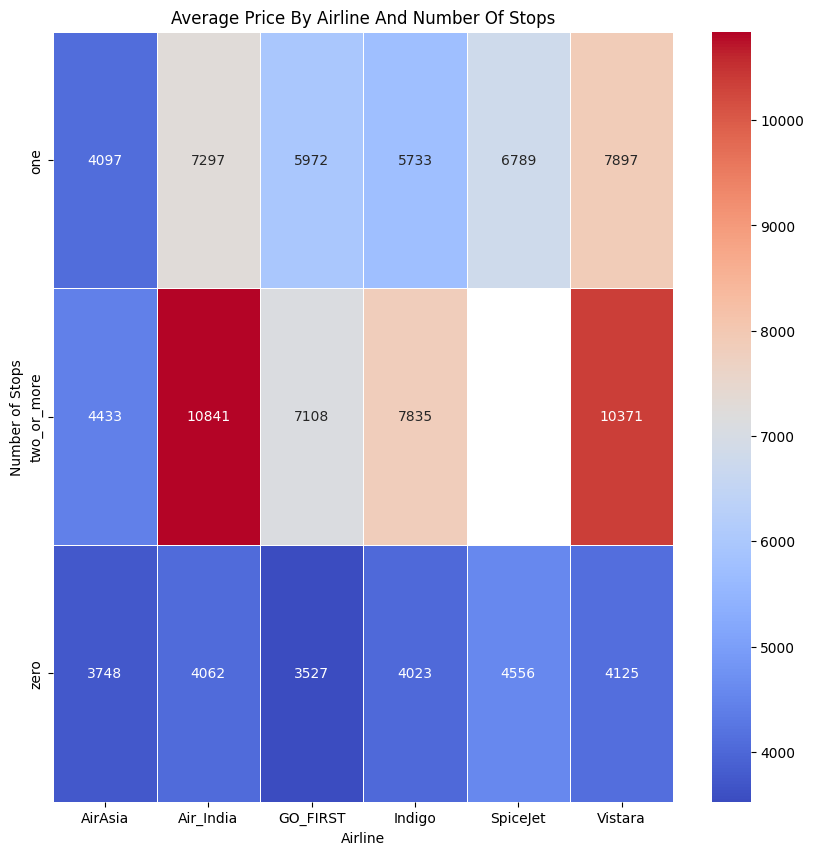

In [26]:
plt.figure(figsize=(10, 10))
pivot_table = economy_flights.pivot_table(index='stops', columns='airline', values='price', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price By Airline And Number Of Stops')
plt.ylabel('Number of Stops')
plt.xlabel('Airline')
plt.show()



This heatmap illustrates the average airfare prices for different airlines in India based on the number of stops on the route.

**Prices based on the number of stops:** Prices generally increase with the number of stops. For example, Air India offers tickets for 4,062 INR for non-stop flights, with the price rising to 10,841 INR for flights with two or more stops.
Vistara typically has higher prices, as seen in both the non-stop and stopover categories. The most expensive tickets for flights with two stops are offered by Vistara at 10,371 INR.
SpiceJet and Indigo offer more competitive prices for non-stop flights, with prices at 4,556 INR and 4,023 INR, respectively.
The empty column in the segment for two or more stops for SpiceJet suggests that this airline does not offer flights with multiple stops, which may result from their business model focused on direct flights or with limited stops.

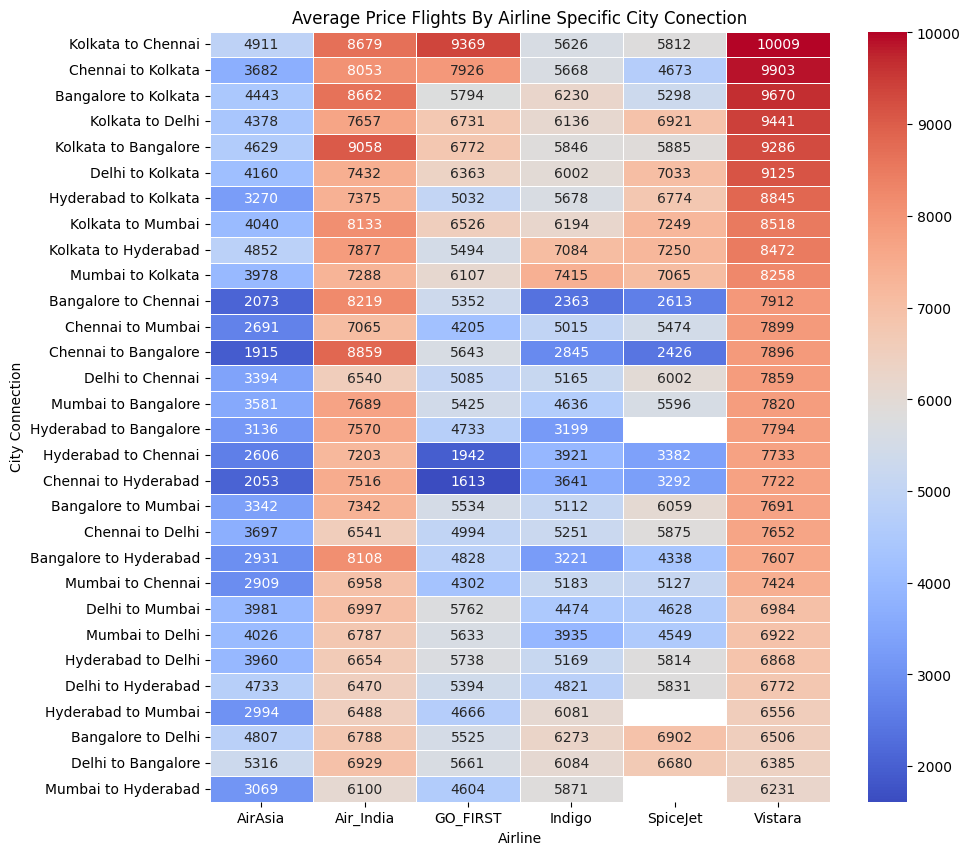

In [27]:
plt.figure(figsize=(10, 10))
pivot_table = economy_flights.pivot_table(index='route', columns='airline', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='Vistara', ascending=False)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price Flights By Airline Specific City Conection')
plt.ylabel('City Connection')
plt.xlabel('Airline')
plt.show()


This heatmap presents data on the average airfare prices by airline for specific intercity routes in India.

Some routes, such as Kolkata to Chennai and Mumbai to Bangalore, consistently show higher average prices across all airlines, as indicated by the presence of dark red shades.
Budget airlines, such as Indigo and SpiceJet, offer competitive prices on many routes, which is reflected in the blue tones in their respective columns.
Premium prices in airlines like Vistara and Air India are visible on several routes, particularly on longer or more popular routes, such as Delhi to Mumbai and Chennai to Delhi.

Additionally, it is worth noting that not all airlines offer connections on every route, which is marked by empty cells on the map.

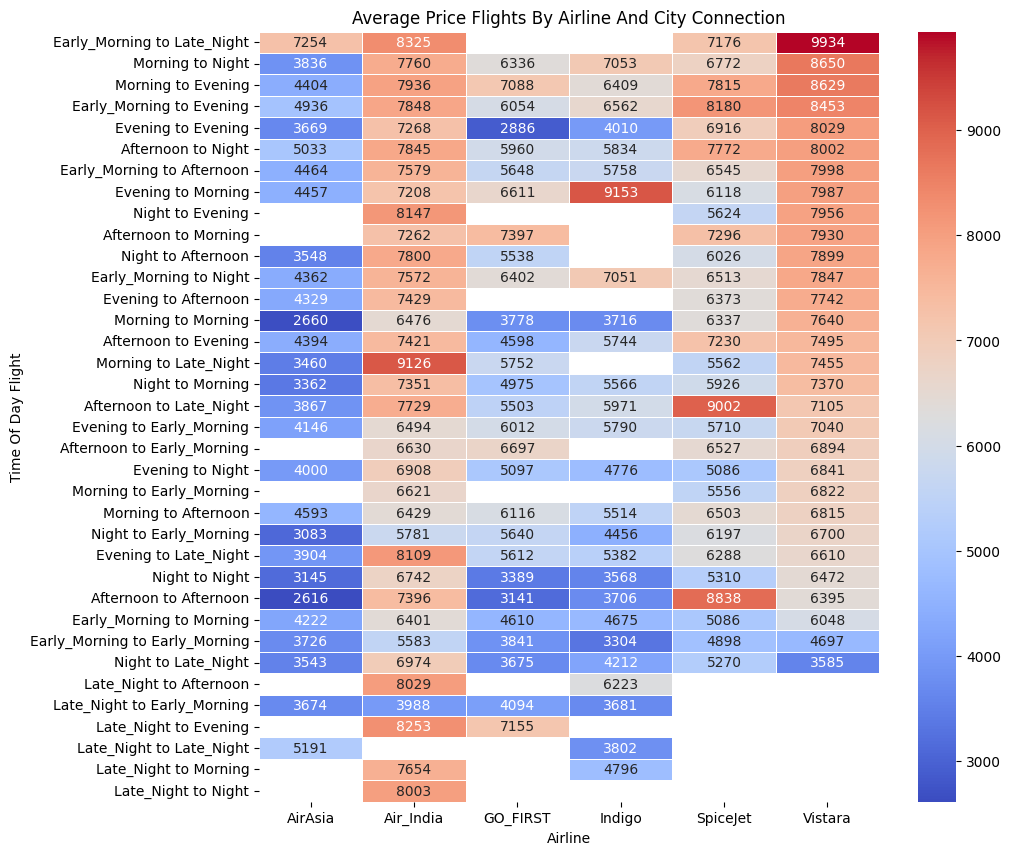

In [28]:
plt.figure(figsize=(10, 10))
pivot_table = economy_flights.pivot_table(index='periot_time_flight', columns='airline', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='Vistara', ascending=False)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price Flights By Airline And City Connection')
plt.ylabel('Time Of Day Flight')
plt.xlabel('Airline')
plt.show()

This heatmap presents the average airfare prices based on the airline and the time of day the flight takes place. Ticket prices vary depending on the time of day, with noticeably higher prices in the morning and evening hours, suggesting higher demand for flights during these times. Airlines like Indigo and SpiceJet offer different prices depending on the time of day, which can be advantageous for flexible travelers who can adjust their travel plans to cheaper time slots.

The most expensive flights typically occur at night, marked by dark red colors, which may reflect lower availability of flights and higher operational costs during these hours.

Certain times of the day, such as "Early Morning" or "Evening to Night," may not have offerings from all airlines, which is indicated by the empty cells on the map.

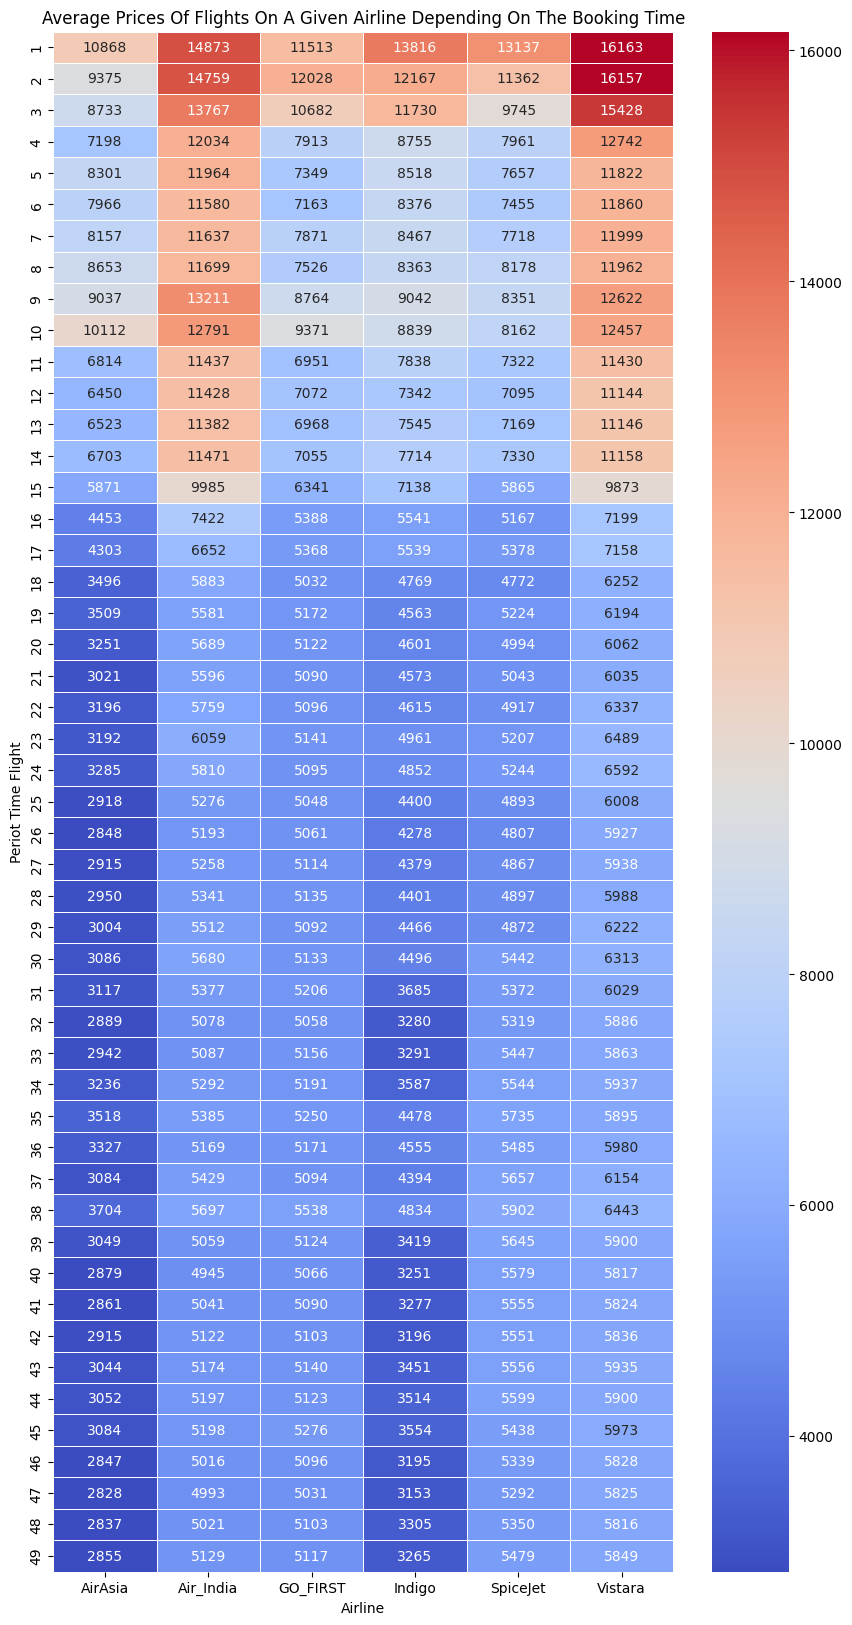

In [29]:
plt.figure(figsize=(10, 20))
pivot_table = economy_flights.pivot_table(index='days_left', columns='airline', values='price', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Prices Of Flights On A Given Airline Depending On The Booking Time')
plt.ylabel('Periot Time Flight')
plt.xlabel('Airline')
plt.show()

This heatmap presents data on average airfare prices by airline depending on the booking time for flights.

Typically, the earlier the booking is made, the lower the ticket prices, which is visible in the gradual transition from red to blue down each column.
The highest prices often occur just before the flight date, as shown by the red shades at the top of the columns.
Prices vary significantly between airlines even within the same time frame, suggesting that different airlines employ different pricing strategies.
Some airlines, like Air India and Indigo, show less drastic price differences depending on the booking time, in contrast to others, which have more noticeable differences (e.g., SpiceJet and Vistara).

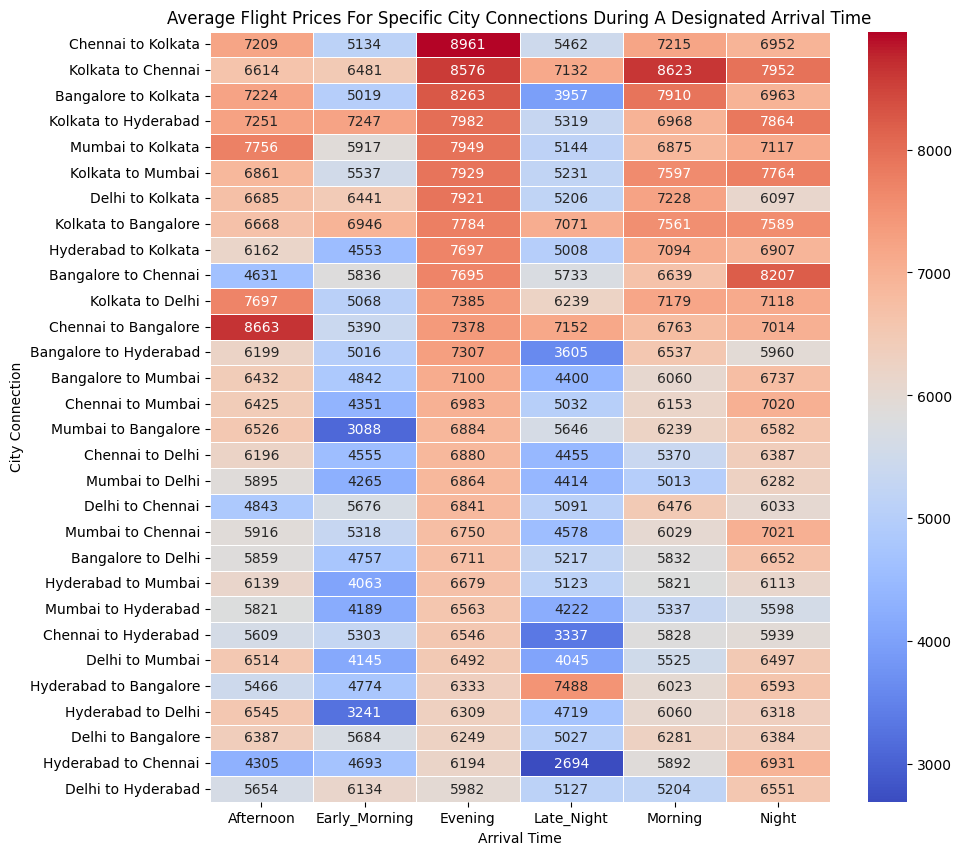

In [30]:
plt.figure(figsize=(10, 10))
pivot_table = economy_flights.pivot_table(index='route', columns='arrival_time', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='Evening', ascending=False)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Flight Prices For Specific City Connections During A Designated Arrival Time')
plt.ylabel('City Connection')
plt.xlabel('Arrival Time')
plt.show()

This heatmap presents data on average airfare prices for specific intercity connections in India based on the arrival time.

Flight prices vary significantly depending on the arrival time, suggesting fluctuating demand throughout the day.
The highest prices often occur for flights arriving in the morning or early morning, marked by red color in many connections.
Night flights generally have lower prices, as indicated by the presence of blue shades in the columns related to night and late-night arrivals.
Price differences between various routes are noticeable, highlighting the importance of choosing the optimal arrival time for cost savings.

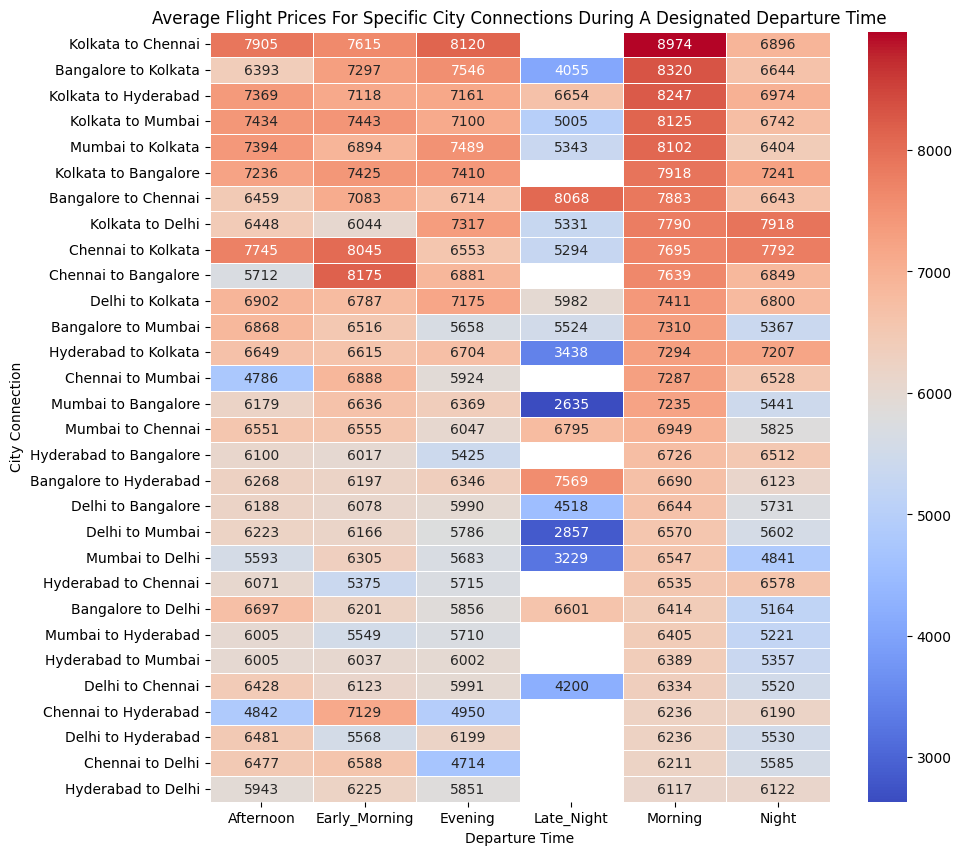

In [31]:
plt.figure(figsize=(10, 10))
pivot_table = economy_flights.pivot_table(index='route', columns='departure_time', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='Morning', ascending=False)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Flight Prices For Specific City Connections During A Designated Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('City Connection')
plt.show()

This heatmap presents the average airfare prices for specific intercity connections in India, categorized by different departure times.

Prices vary depending on the time of departure, suggesting differences in demand and availability at different times of the day.
The highest prices are often observed for morning and evening flights, as illustrated by the dark red color in the corresponding columns.
Night and late-night flights tend to have lower prices, as indicated by the dominance of blue shades in these time slots.
Flights with stopovers (column "City connection") often have variable prices, with some connections showing high prices, indicating the costly nature of stopovers or limited availability of direct flights.

Some time slots may not have offerings from all airlines, which is visible through the empty cells.

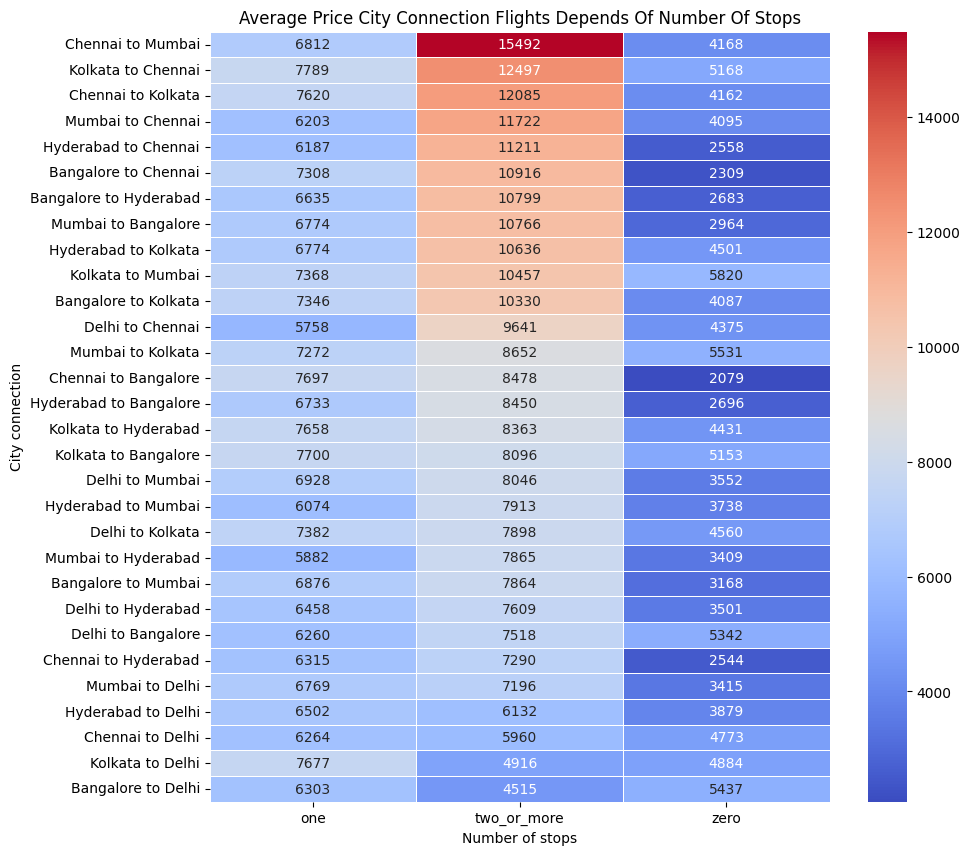

In [32]:
plt.figure(figsize=(10, 10))
pivot_table = economy_flights.pivot_table(index='route', columns='stops', values='price', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='two_or_more', ascending=False)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Average Price City Connection Flights Depends Of Number Of Stops')
plt.ylabel('City connection')
plt.xlabel('Number of stops')
plt.show()

The presented heatmap displays data on average airfare prices between different city connections in India, considering various airlines and city stopover connections.
The map includes different routes, such as Bangalore to Chennai, Delhi to Mumbai, Kolkata to Hyderabad, and others.

There is significant price variation depending on the route and type of connection. For instance, flights from Chennai to Kolkata and Chennai to Mumbai with stopovers show very high average prices, marked in red. Flights with stopovers often have higher prices, which is evident in several cases where cells with higher prices are concentrated in the column dedicated to stopover flights.

Some connections, such as Bangalore to Hyderabad or Hyderabad to Bangalore, show relatively low prices, which are indicated by the light blue color.

### Duration

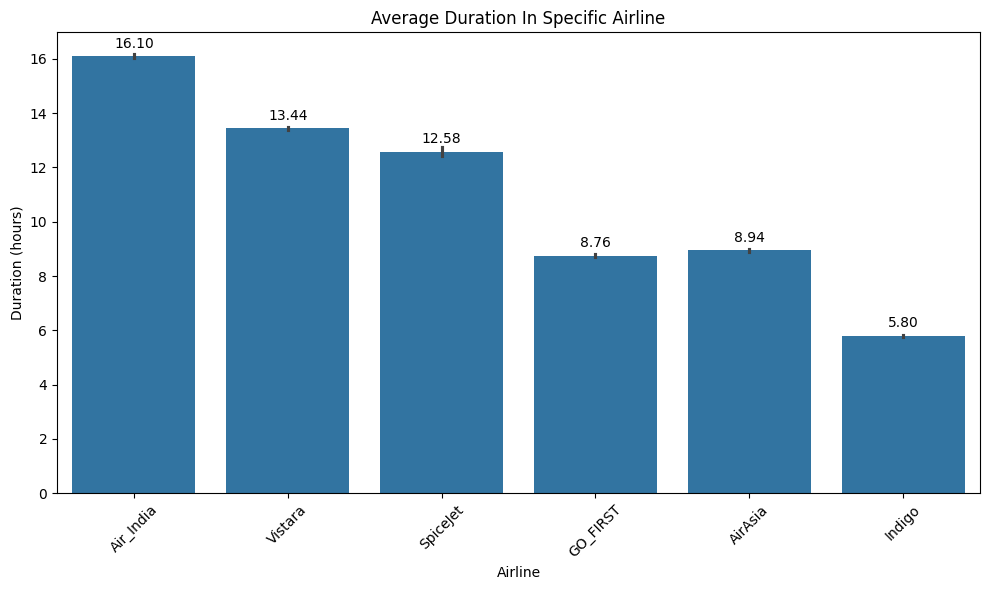

In [33]:
sorted_flights = economy_flights.sort_values('duration', ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='airline', y='duration', data=sorted_flights)
plt.title('Average Duration In Specific Airline')
plt.xlabel('Airline')
plt.ylabel('Duration (hours)')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The chart shows the average flight duration for different airlines. The data is expressed in hours and visually compared using bars, making it easier to understand the differences between the various carriers.

Air India has the longest average flight duration at 16.10 hours, which may suggest that this airline operates longer international routes or has more flights with stopovers.
Vistara has the second longest average flight time, at 13.44 hours, which could also indicate a significant number of longer routes in their network.
SpiceJet and AirAsia have significantly shorter average flight times, at 12.58 and 8.94 hours respectively, which may indicate that they primarily focus on shorter routes.
GO_FIRST and Indigo, known for their low-cost operations, also have short average flight times, at 8.76 and 5.80 hours respectively, which is typical of carriers focusing on efficiency and short routes.

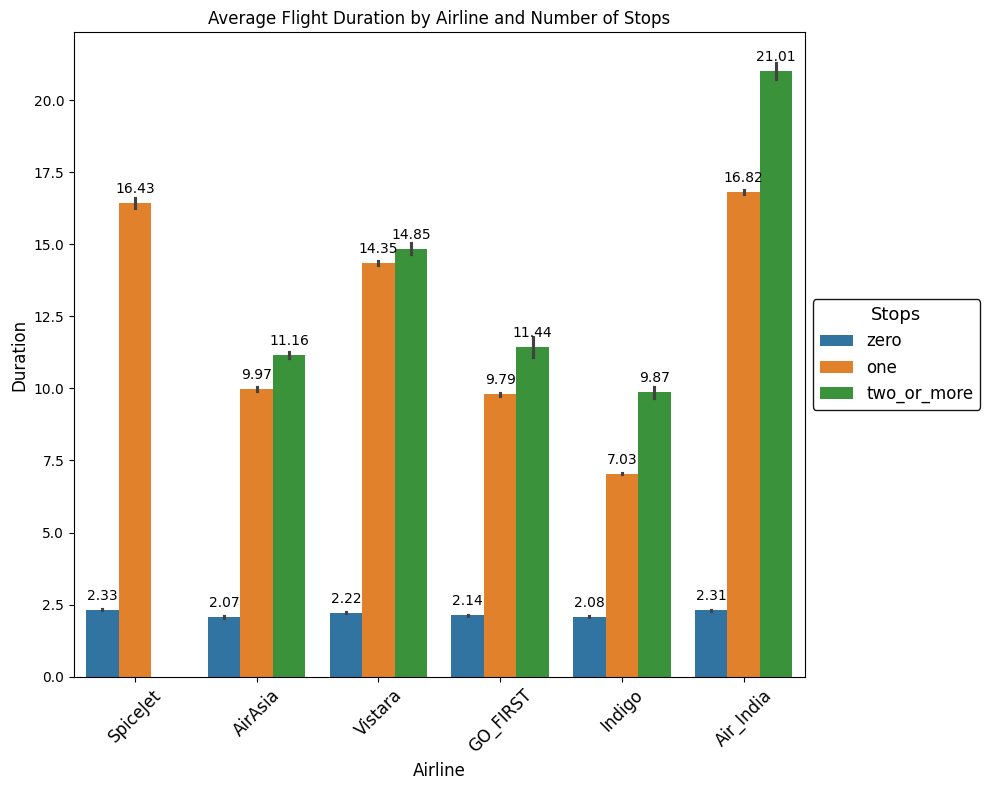

In [34]:
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='airline', y='duration', hue='stops', data=economy_flights)
plt.title('Average Flight Duration by Airline and Number of Stops', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.xticks(rotation=45, fontsize=12)

for p in barplot.containers:
    barplot.bar_label(p, fmt='%.2f', label_type='edge', padding=5)

plt.legend(title='Stops', fontsize=12, title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, framealpha=0.9, facecolor='white', edgecolor='black')

plt.tight_layout()
plt.show()



The bar chart presents the average flight duration for different airlines based on the number of stops.

Air India has the longest average flight duration among all the analyzed airlines, especially for flights with two or more stops, reaching 21.01 hours. This airline also has longer non-stop flights (2.31 hours) and flights with one stop (16.82 hours).

Vistara also offers long flights, particularly those with one stop (14.35 hours) and two or more stops (14.85 hours). The duration of their non-stop flights is significantly shorter, at 2.22 hours.

Indigo and SpiceJet have shorter average flight durations across all types of connections. Notably, Indigo offers very short non-stop flights at 2.08 hours, and SpiceJet has 2.33 hours for direct flights.

GO_FIRST and AirAsia show a similar pattern to Indigo and SpiceJet, with short non-stop flight durations but longer durations for flights with stops.

Airlines like Air India and Vistara, which offer longer flights with stopovers, may be operating on longer international routes or more complex domestic routes with multiple stops.

Airlines such as SpiceJet, Indigo, and GO_FIRST, which focus on shorter flights, are likely concentrating on efficiency and frequent domestic connections, which is typical for low-cost carriers.

There is a clear distinction between airlines that primarily operate shorter domestic routes and those that serve longer international or complex domestic routes with multiple stops.

### Airplane Speed

In [35]:
stops_mapping = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}
economy_flights['stops'] = economy_flights['stops'].map(stops_mapping)


/var/folders/zp/fzly6hjs1q1dqk65hym5d38r0000gn/T/ipykernel_6473/465454395.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=12)


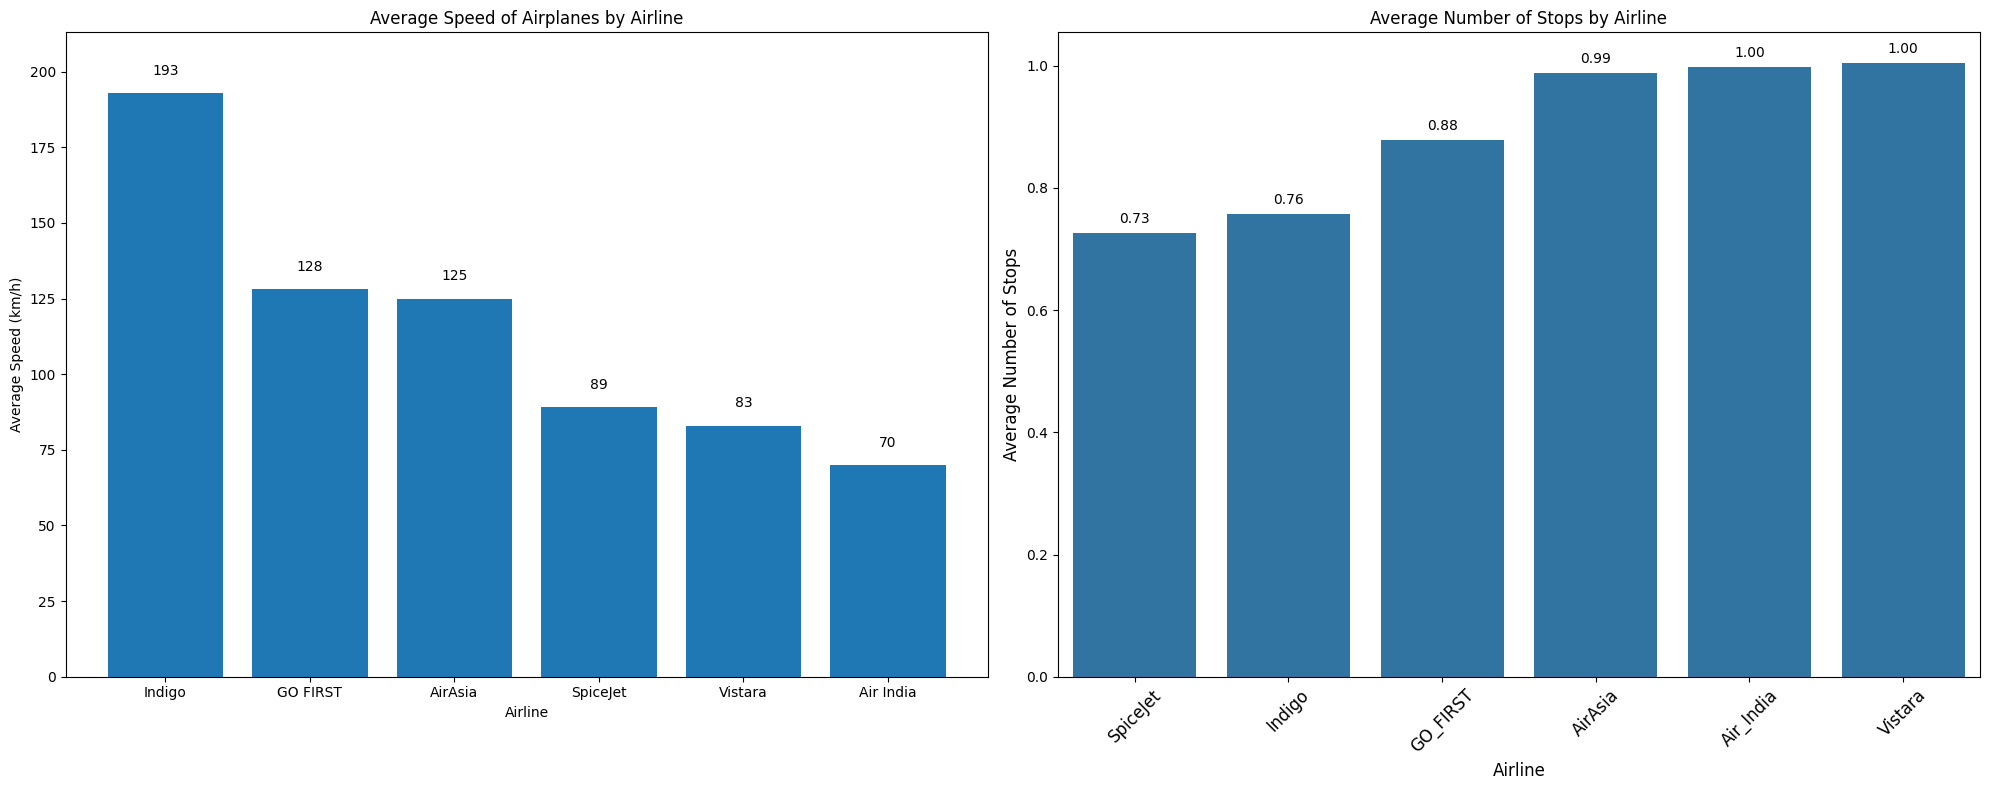

In [36]:
durations = {
    'Air India': 16.10,
    'Vistara': 13.44,
    'SpiceJet': 12.58,
    'GO FIRST': 8.76,
    'AirAsia': 8.94,
    'Indigo': 5.80
}
round_trip_distance_km = 1119 


speeds = {airline: round(round_trip_distance_km / duration) for airline, duration in durations.items()}


sorted_speeds = dict(sorted(speeds.items(), key=lambda item: item[1], reverse=True))


average_stops = economy_flights.groupby('airline')['stops'].mean().reset_index()

average_stops = average_stops.sort_values(by='stops', ascending=True)


fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].bar(sorted_speeds.keys(), sorted_speeds.values())
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Average Speed (km/h)')
axes[0].set_title('Average Speed of Airplanes by Airline')
axes[0].set_ylim(0, max(sorted_speeds.values()) + 20)

for bar in axes[0].patches:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

if not average_stops.empty:
    sns.barplot(x='airline', y='stops', data=average_stops, ax=axes[1])
    axes[1].set_title('Average Number of Stops by Airline', fontsize=12)
    axes[1].set_xlabel('Airline', fontsize=12)
    axes[1].set_ylabel('Average Number of Stops', fontsize=12)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=12)

    for p in axes[1].containers:
        axes[1].bar_label(p, fmt='%.2f', label_type='edge', padding=5)
else:
    axes[1].text(0.5, 0.5, 'No data available to plot', ha='center', va='center', fontsize=15)
    axes[1].set_axis_off()

plt.tight_layout()
plt.show()



The following charts compare the average speed of airplanes and the average number of stops across different airlines.

Left Chart:
Title: "Average Speed of Airplanes by Airline".
Description: This bar chart presents the average flight speed for six different airlines.
Indigo leads with the highest average speed of 193 km/h.
GO FIRST and AirAsia follow with speeds of 128 km/h and 125 km/h, respectively.
SpiceJet records an average speed of 89 km/h.
Vistara and Air India have lower average speeds of 83 km/h and 70 km/h, respectively.

Right Chart:
Title: "Average Number of Stops by Airline".
Description: The second bar chart illustrates the average number of stops made by the same airlines.
SpiceJet has the fewest stops with an average of 0.73 stops.
Indigo and GO FIRST show similar numbers with averages of 0.76 and 0.88 stops, respectively.
AirAsia, Air India, and Vistara each have close to 1.0 stops on average, indicating that they make one stop on most flights.

Overall Interpretation:
Indigo stands out with the highest average speed among the airlines analyzed.
SpiceJet offers the lowest average number of stops, which might appeal to passengers looking for more direct flights.
The other airlines, while showing varied speeds, tend to have around one stop on average, with Vistara and Air India being on the lower end of speed but still consistent in the number of stops.